In [1]:
!sudo apt-get install -y texlive-latex-extra texlive-fonts-recommended cm-super dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb
  poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils tex-common
  tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-framework-java l

In [2]:
import os
import numpy as np
from glob import glob
from scipy import optimize
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
import pickle


In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "helvetica",
    "font.serif": ["helvetica"]
})

## Defecto 1

In [4]:
# Visibility
uploaded = files.upload()
data_file_path_visibility_analysed_b = list(uploaded.keys())[0]
print(data_file_path_visibility_analysed_b)

# We load the file
with open(data_file_path_visibility_analysed_b, "rb") as archivo:
    loaded_data_B = pickle.load(archivo)

delay_B = loaded_data_B["Delay (fs)"]
visibility_B = loaded_data_B["Visibility"]
std_visbility_B = loaded_data_B["Error in visibility"]

Saving 653_blue_5mW.pkl to 653_blue_5mW.pkl
653_blue_5mW.pkl


In [5]:
# Visibility
uploaded = files.upload()
data_file_path_visibility_analysed = list(uploaded.keys())[0]
print(data_file_path_visibility_analysed)

# We load the file
with open(data_file_path_visibility_analysed, "rb") as archivo:
    loaded_data_G = pickle.load(archivo)

delay_G = loaded_data_G["Delay (fs)"]
visibility_G = loaded_data_G["Visibility"]
std_visbility_G = loaded_data_G["Error in visibility"]

Saving 653_green_5mW.pkl to 653_green_5mW.pkl
653_green_5mW.pkl


<ErrorbarContainer object of 3 artists>

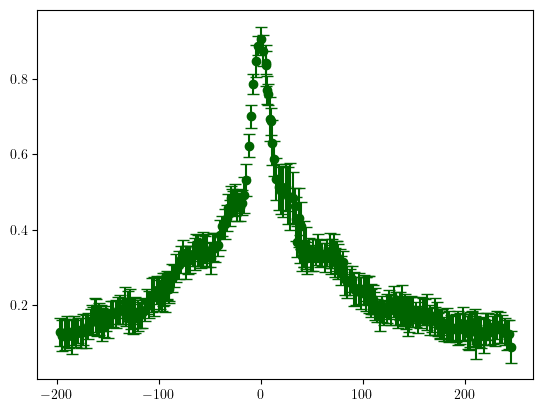

In [6]:
plt.errorbar(loaded_data_G["Delay (fs)"],loaded_data_G["Visibility"], loaded_data_G["Error in visibility"],marker = 'o',linestyle='none',color = 'darkgreen',capsize = 4,label = r'Spectrum $\lambda_{green}$')

In [7]:
# Fitting function with a straight line with certain slope for background
def lorentzian(x, A, x0, FWHM): # Lorentzian curve with a curve with gradient for background
    return A * FWHM / (2 * np.pi * ((x-x0)**2 + (FWHM/2)**2))
def lorentzianSeven(x, A0, x0, FWHM0, A1, x1, FWHM1, A2, x2, FWHM2, A3, x3, FWHM3, A4, A5, A6, x6, FWHM6, m, c): # Lorentzian curve with a curve with gradient for background
    return A0 * FWHM0 / (2 * np.pi * ((x-x0)**2 + (FWHM0/2)**2)) + A1 * FWHM1 / (2 * np.pi * ((x-x1)**2 + (FWHM1/2)**2))+ A2 * FWHM2 / (2 * np.pi * ((x-x2)**2 + (FWHM2/2)**2))+ A3 * FWHM3 / (2 * np.pi * ((x-x3)**2 + (FWHM3/2)**2))+ A4 * FWHM3 / (2 * np.pi * ((x+x3)**2 + (FWHM3/2)**2))+ A5 * FWHM2 / (2 * np.pi * ((x+x2)**2 + (FWHM2/2)**2))+ A6 * FWHM6 / (2 * np.pi * ((x-x6)**2 + (FWHM6/2)**2))+ m*x + c

Saving Espectro azul.csv to Espectro azul.csv
Espectro azul.csv


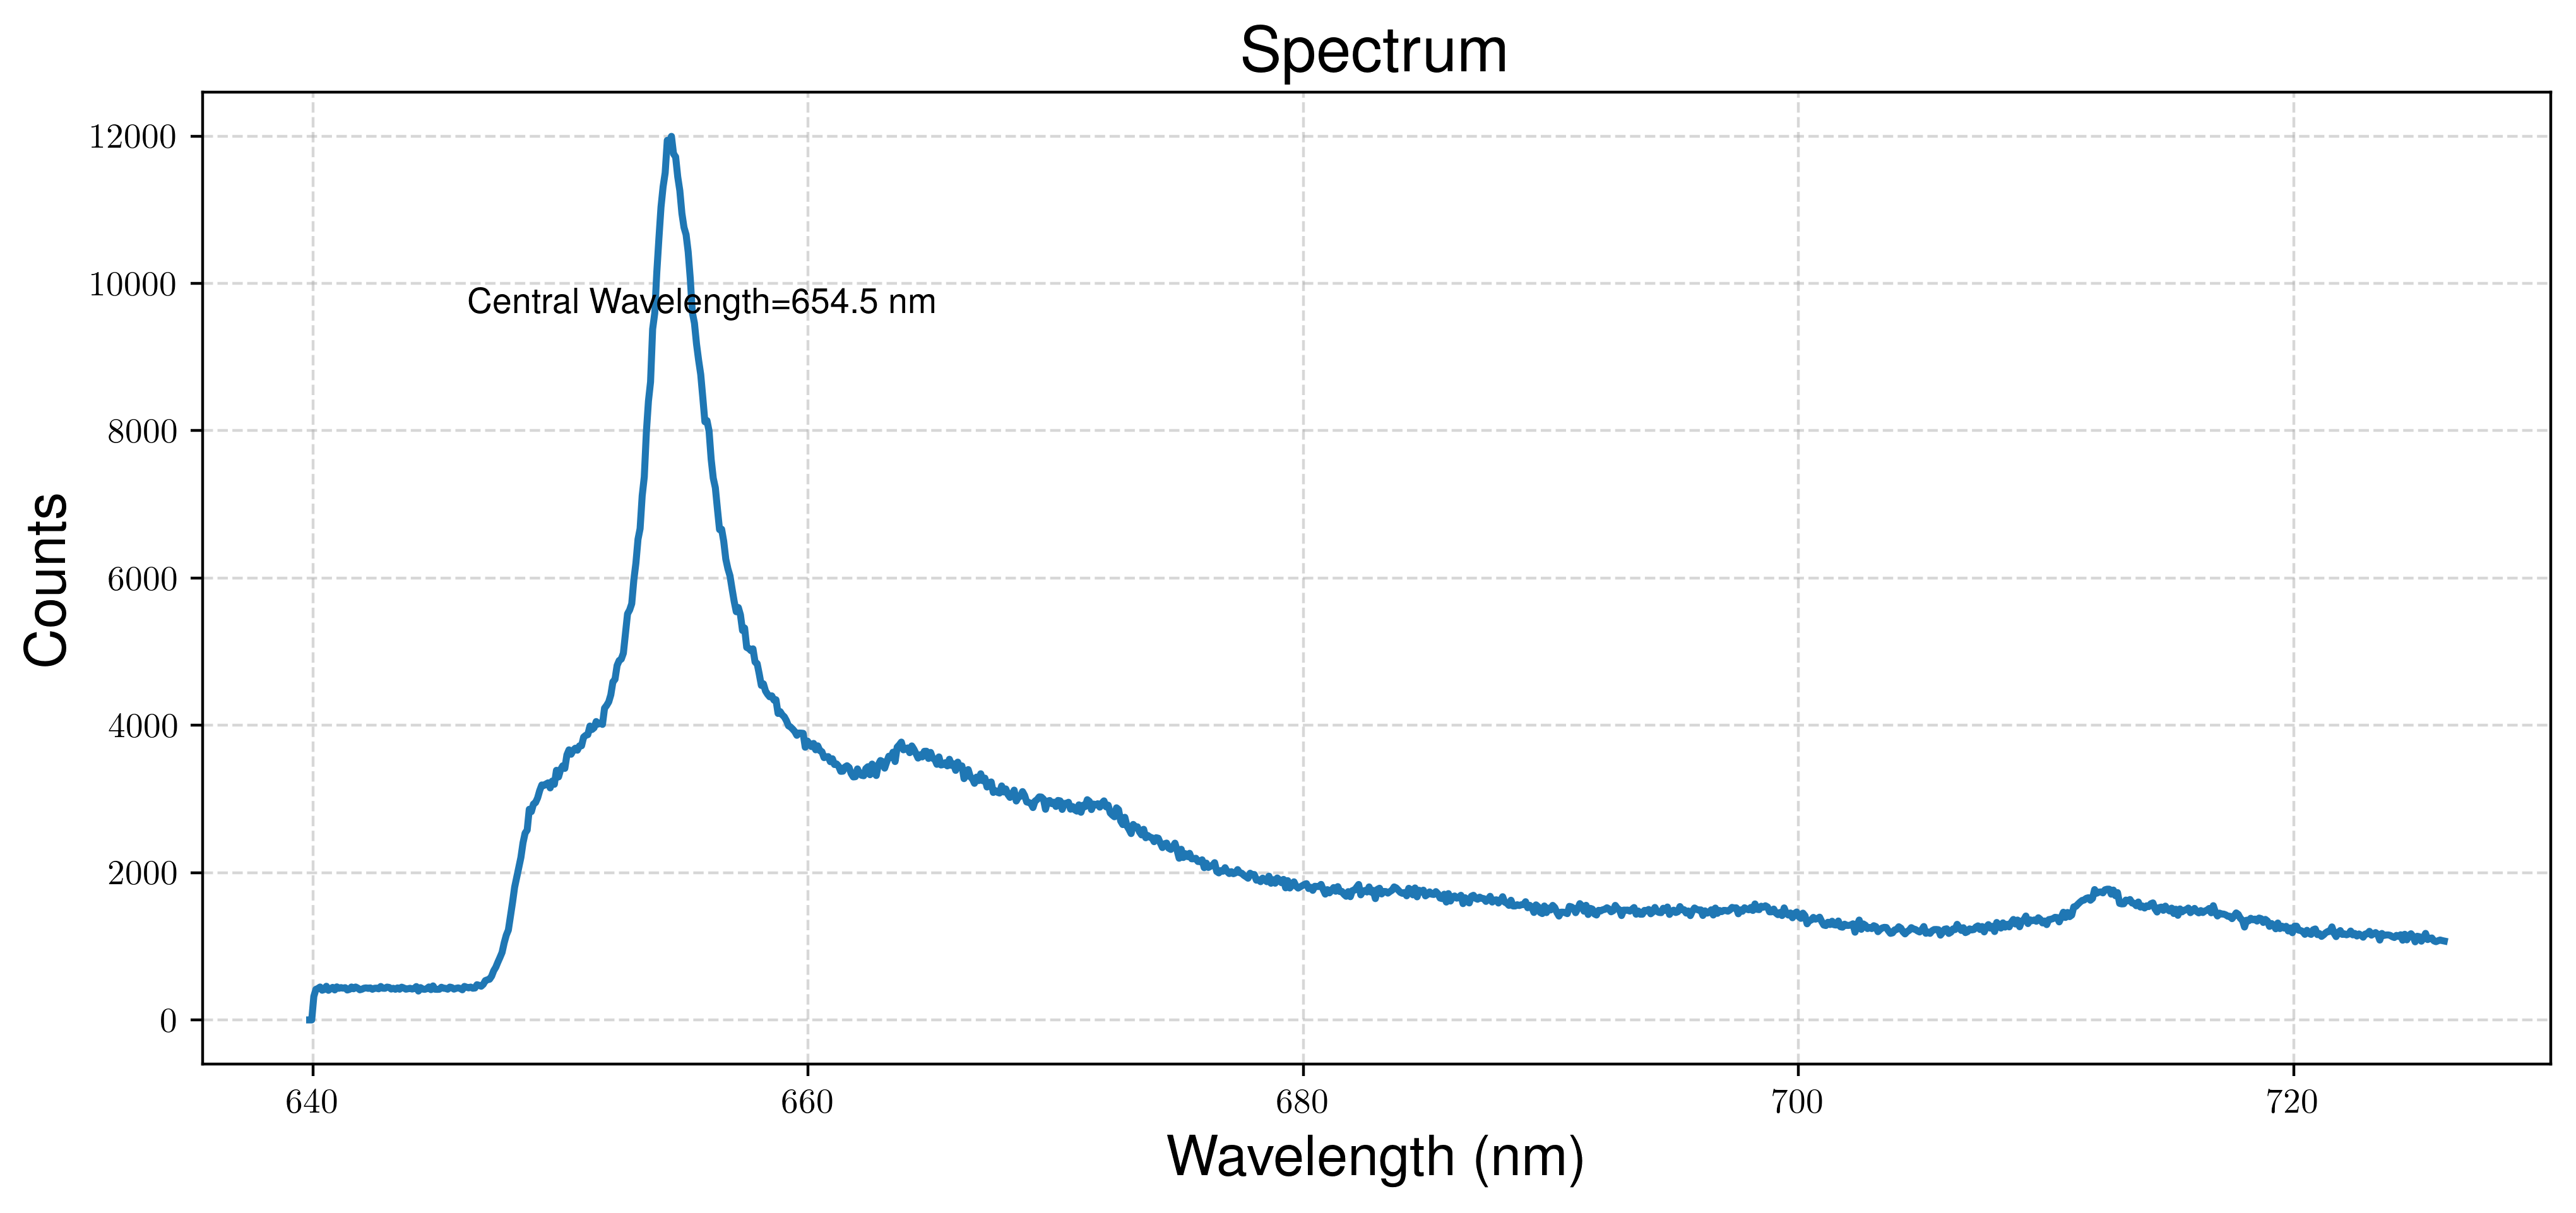

In [8]:
# Spectrum
uploaded = files.upload()
open_file = list(uploaded.keys())[0]
print(open_file)

## Visualization of the uploaded data ##

# Load in data
wav, counts, _, _, _, _ = np.loadtxt(open_file, delimiter=',', unpack = True, skiprows=1)

# Find peak
max_count_ind = np.argmax(counts)
peak_wav, peak_count = wav[max_count_ind], counts[max_count_ind]

font = 'serif'
plt.figure(figsize=(12, 5), dpi=400)
plt.plot(wav, counts, linewidth=2)
plt.text(min(wav)*1.01, max(counts)*0.8, f'Central Wavelength={peak_wav:.1f} nm', fontname=font)


# Labels and title
plt.title("Spectrum", fontsize=18, fontname=font)
plt.xlabel("Wavelength (nm)", fontsize=16, fontname=font)
plt.ylabel("Counts", fontsize=16, fontname=font)

# Grid and style
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

Saving Espectro verde.csv to Espectro verde.csv
Espectro verde.csv


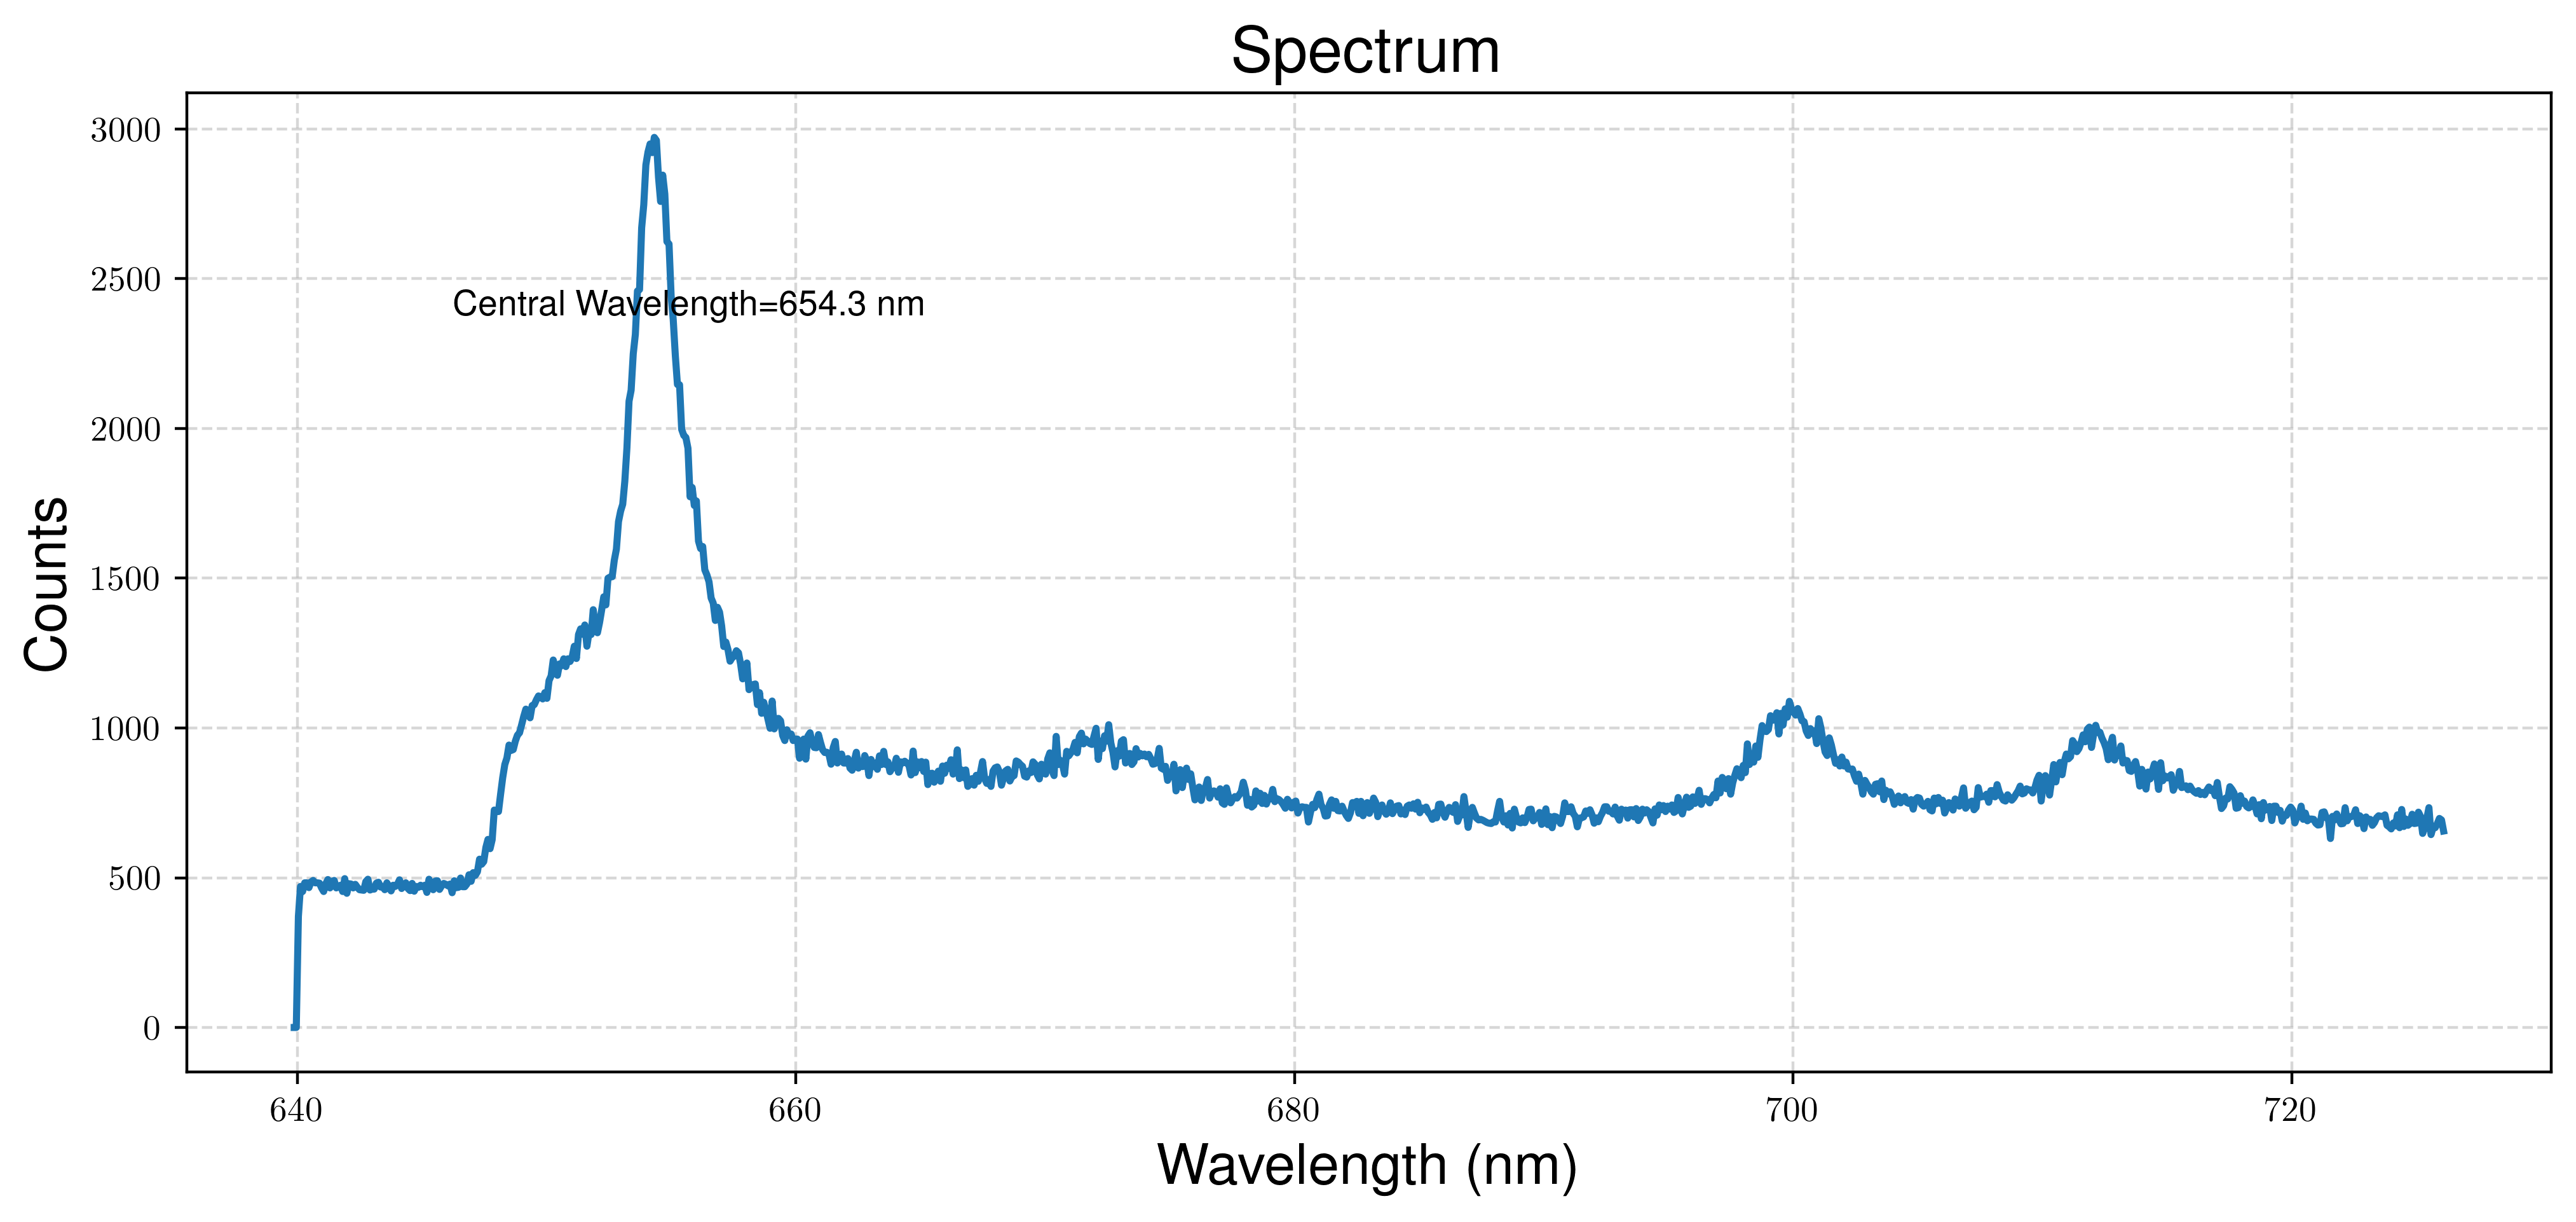

In [9]:
# Spectrum
uploaded = files.upload()
open_file2 = list(uploaded.keys())[0]
print(open_file2)

## Visualization of the uploaded data ##

# Load in data
wav2, counts2, _, _, _, _ = np.loadtxt(open_file2, delimiter=',', unpack = True, skiprows=1)

# Find peak
max_count_ind2 = np.argmax(counts2)
peak_wav2, peak_count2 = wav2[max_count_ind2], counts2[max_count_ind2]

font = 'serif'
plt.figure(figsize=(12, 5), dpi=400)
plt.plot(wav2, counts2, linewidth=2)
plt.text(min(wav2)*1.01, max(counts2)*0.8, f'Central Wavelength={peak_wav2:.1f} nm', fontname=font)


# Labels and title
plt.title("Spectrum", fontsize=18, fontname=font)
plt.xlabel("Wavelength (nm)", fontsize=16, fontname=font)
plt.ylabel("Counts", fontsize=16, fontname=font)

# Grid and style
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

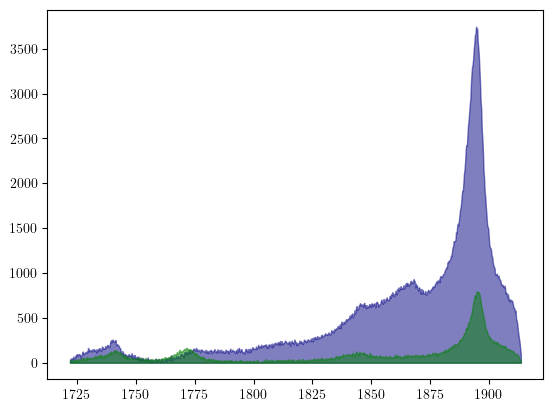

In [10]:
wav_min = 648
wav_max =720
wav_ROI = wav[np.abs(wav - wav_min).argmin():np.abs(wav - wav_max).argmin()]
counts_wav_ROI = counts[np.abs(wav - wav_min).argmin():np.abs(wav - wav_max).argmin()]

#Background correction
counts_wav_ROI = counts_wav_ROI-min(counts_wav_ROI)


# Find peak
max_count_ind = np.argmax(counts_wav_ROI)
peak_wav, peak_count = wav_ROI[max_count_ind], counts_wav_ROI[max_count_ind]
def nm_to_meV(wavelength_nm):
    return 1.23984e6 / wavelength_nm

energy_ROI = [nm_to_meV(wl) for wl in wav_ROI]
detuning_ROI = energy_ROI - energy_ROI[max_count_ind]
#counts_ROI = counts_wav_ROI
counts_ROI = [counts_wav_ROI[i]*1.23984e6/(energy_ROI[i]**2) for i in range(len(counts_wav_ROI))] # Jacobian correction


wav_ROI2 = wav2[np.abs(wav2 - wav_min).argmin():np.abs(wav2 - wav_max).argmin()]
counts_wav_ROI2 = counts2[np.abs(wav2 - wav_min).argmin():np.abs(wav2 - wav_max).argmin()]

# Background correction
counts_wav_ROI2 = counts_wav_ROI2 - min(counts_wav_ROI2)

# Find peak
max_count_ind2 = np.argmax(counts_wav_ROI2)
peak_wav2, peak_count2 = wav_ROI2[max_count_ind2], counts_wav_ROI2[max_count_ind2]

energy_ROI2 = [nm_to_meV(wl2) for wl2 in wav_ROI2]
detuning_ROI2 = energy_ROI2 - energy_ROI2[max_count_ind2]

# counts_ROI2 = counts_wav_ROI2
counts_ROI2 = [counts_wav_ROI2[i] * 1.23984e6 / (energy_ROI2[i]**2) for i in range(len(counts_wav_ROI2))]  # Jacobian correction


plt.fill_between(energy_ROI, counts_ROI, color = 'navy', alpha = 0.5)
plt.fill_between(energy_ROI2, counts_ROI2, color = 'green', alpha = 0.5)
#plt.plot(wav2, counts2)

#plt.xlim(wav_min,wav_max)


In [11]:
from scipy.optimize import curve_fit

# Definimos el modelo exponencial decreciente
def modelo_exp(x, A, B, C):
    return A * np.exp(-(1/B) * np.abs(x)) + C

# Ajuste con curve_fit
poptb, pcovb = curve_fit(modelo_exp, loaded_data_B["Delay (fs)"],loaded_data_B["Visibility"], p0=(1, 100, 0))  # p0 son estimaciones iniciales
poptg, pcovg = curve_fit(modelo_exp, loaded_data_G["Delay (fs)"],loaded_data_G["Visibility"], p0=(1, 100, 0))  # p0 son estimaciones iniciales

Text(0, 0.5, '\\textbf{Visibility}')

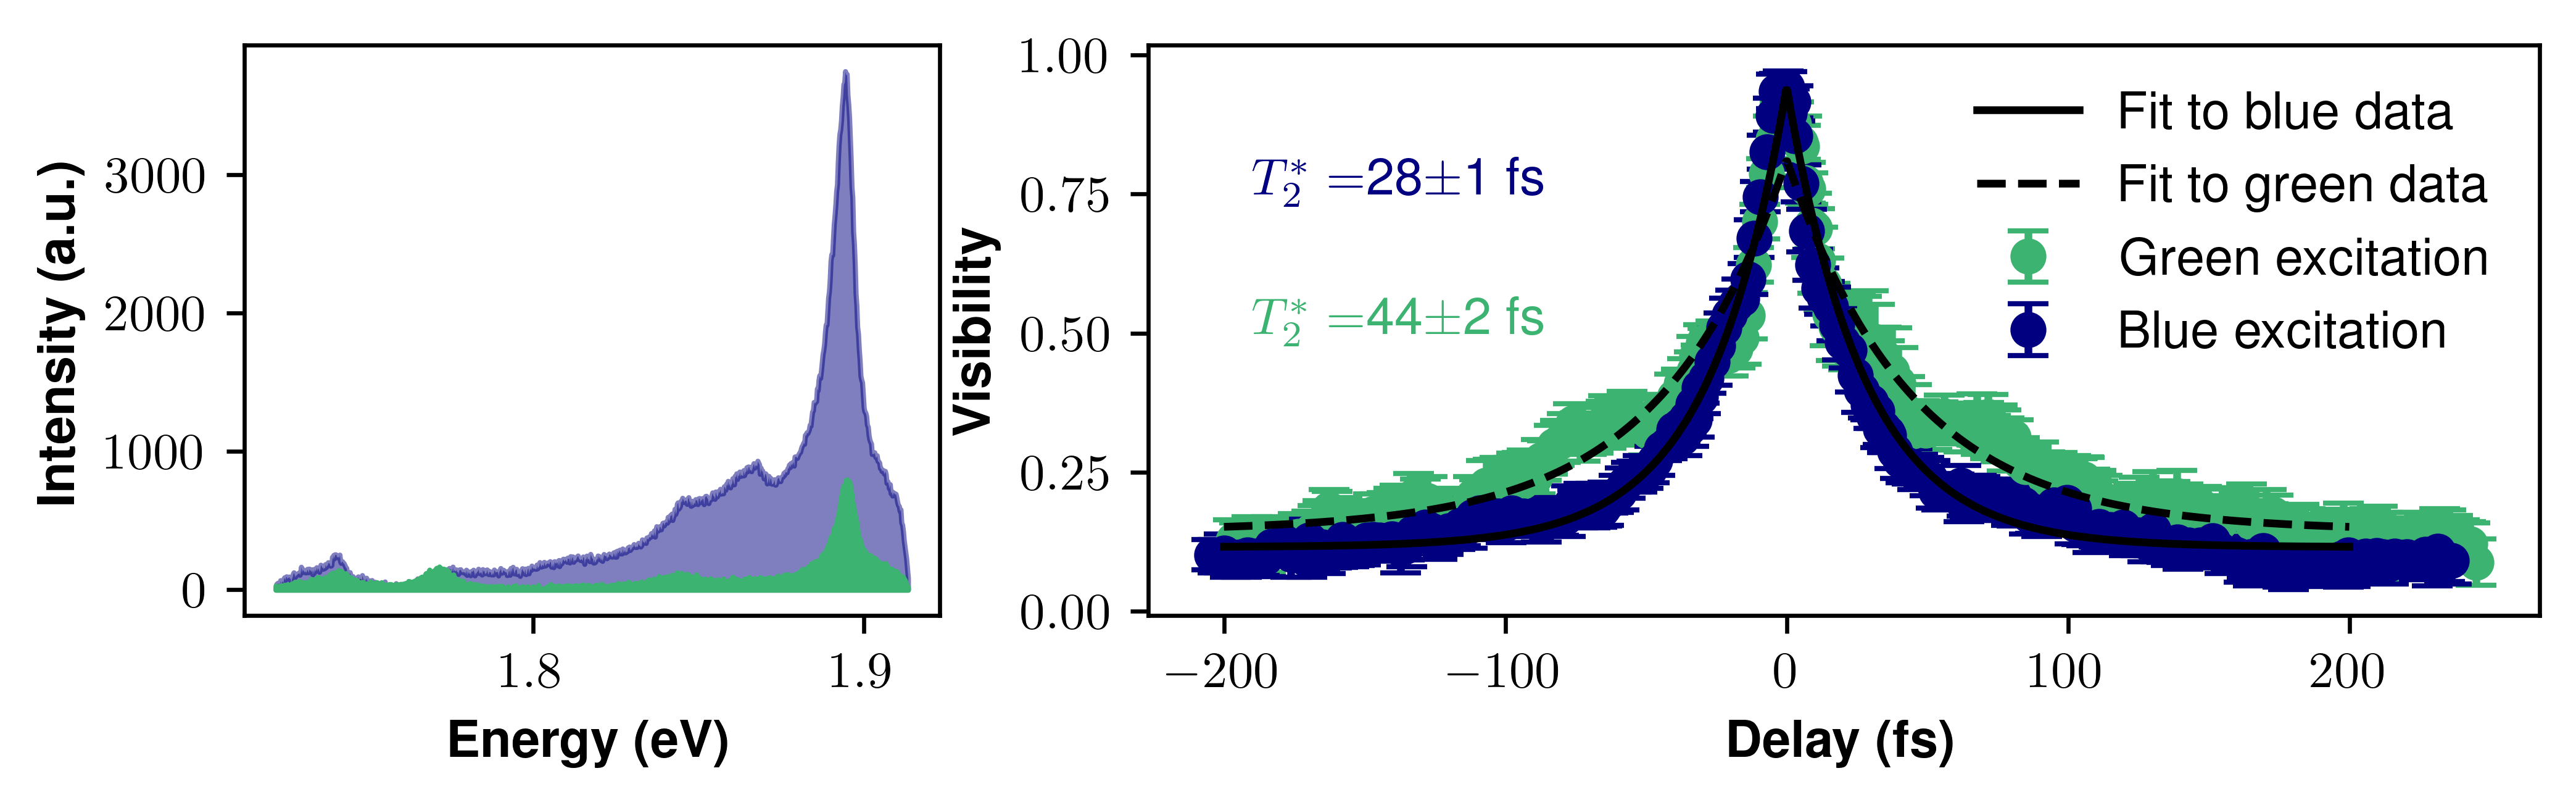

In [12]:
fig, axs = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(8, 2),
    dpi=600,
    gridspec_kw={'width_ratios': [1, 2]}  # izquierda = 1, derecha = 2
)

axs[0].fill_between(np.array(energy_ROI)/1000, counts_ROI, color='navy', alpha=0.5)
axs[0].fill_between(np.array(energy_ROI2)/1000, np.array(counts_ROI2), color='mediumseagreen', alpha=1)
axs[0].set_xlabel(r'\textbf{Energy (eV)}')
axs[0].set_ylabel(r'\textbf{Intensity (a.u.)}')

x_val=np.linspace(-200, 200, 1000)
axs[1].errorbar(loaded_data_G["Delay (fs)"],loaded_data_G["Visibility"], loaded_data_G["Error in visibility"],marker = 'o',linestyle='none',color = 'mediumseagreen',capsize = 4,alpha = 1,label = r'Green excitation')
axs[1].errorbar(loaded_data_B["Delay (fs)"],loaded_data_B["Visibility"], loaded_data_B["Error in visibility"],marker = 'o',linestyle='none',color = 'navy',capsize = 4,alpha = 1,label = r'Blue excitation')
axs[1].plot(x_val, modelo_exp(x_val, *poptb), color='k', linestyle='-', label='Fit to blue data',zorder=3)
axs[1].plot(x_val, modelo_exp(x_val, *poptg), color='k', linestyle='--', label='Fit to green data',zorder=3)
axs[1].text(-190,0.75,r'$T_2^* = $'+f'{int(round(poptb[1]))}'+r'$\pm$'+ f'{int(np.ceil(pcovb[1,1]))}' +' fs', color = 'navy')
axs[1].text(-190,0.5,r'$T_2^* = $'+f'{int(round(poptg[1]))}'+r'$\pm$'+ f'{int(round(pcovg[1,1]))}' +' fs', color = 'mediumseagreen')
axs[1].legend(frameon=False)
axs[1].set_xlabel(r'\textbf{Delay (fs)}')
axs[1].set_ylabel(r'\textbf{Visibility}')

## Defecto 2

In [13]:
# Visibility
uploaded = files.upload()
data_file_path_visibility_analysed_2b = list(uploaded.keys())[0]
print(data_file_path_visibility_analysed_2b)

# We load the file
with open(data_file_path_visibility_analysed_2b, "rb") as archivo:
    loaded_data_2B = pickle.load(archivo)

delay_2B = loaded_data_2B["Delay (fs)"]
visibility_2B = loaded_data_2B["Visibility"]
std_visbility_2B = loaded_data_2B["Error in visibility"]

Saving 597_blue_0.26_mW.pkl to 597_blue_0.26_mW.pkl
597_blue_0.26_mW.pkl


In [14]:
# Visibility
uploaded = files.upload()
data_file_path_visibility_analysed_2g = list(uploaded.keys())[0]
print(data_file_path_visibility_analysed_2g)

# We load the file
with open(data_file_path_visibility_analysed_2g, "rb") as archivo:
    loaded_data_2G = pickle.load(archivo)

delay_2G = loaded_data_2G["Delay (fs)"]
visibility_2G = loaded_data_2G["Visibility"]
std_visbility_2G = loaded_data_2G["Error in visibility"]

Saving 597_green_0.26_noSP.pkl to 597_green_0.26_noSP.pkl
597_green_0.26_noSP.pkl


In [15]:
# Ajuste con curve_fit
popt2b, pcov2b = curve_fit(modelo_exp, loaded_data_2B["Delay (fs)"],loaded_data_2B["Visibility"], p0=(1, 100, 0))  # p0 son estimaciones iniciales
popt2g, pcov2g = curve_fit(modelo_exp, loaded_data_2G["Delay (fs)"],loaded_data_2G["Visibility"], p0=(1, 10, 0))  # p0 son estimaciones iniciales

Saving F3-597-25.07.2025-13.38-BG-blue.csv to F3-597-25.07.2025-13.38-BG-blue.csv
F3-597-25.07.2025-13.38-BG-blue.csv


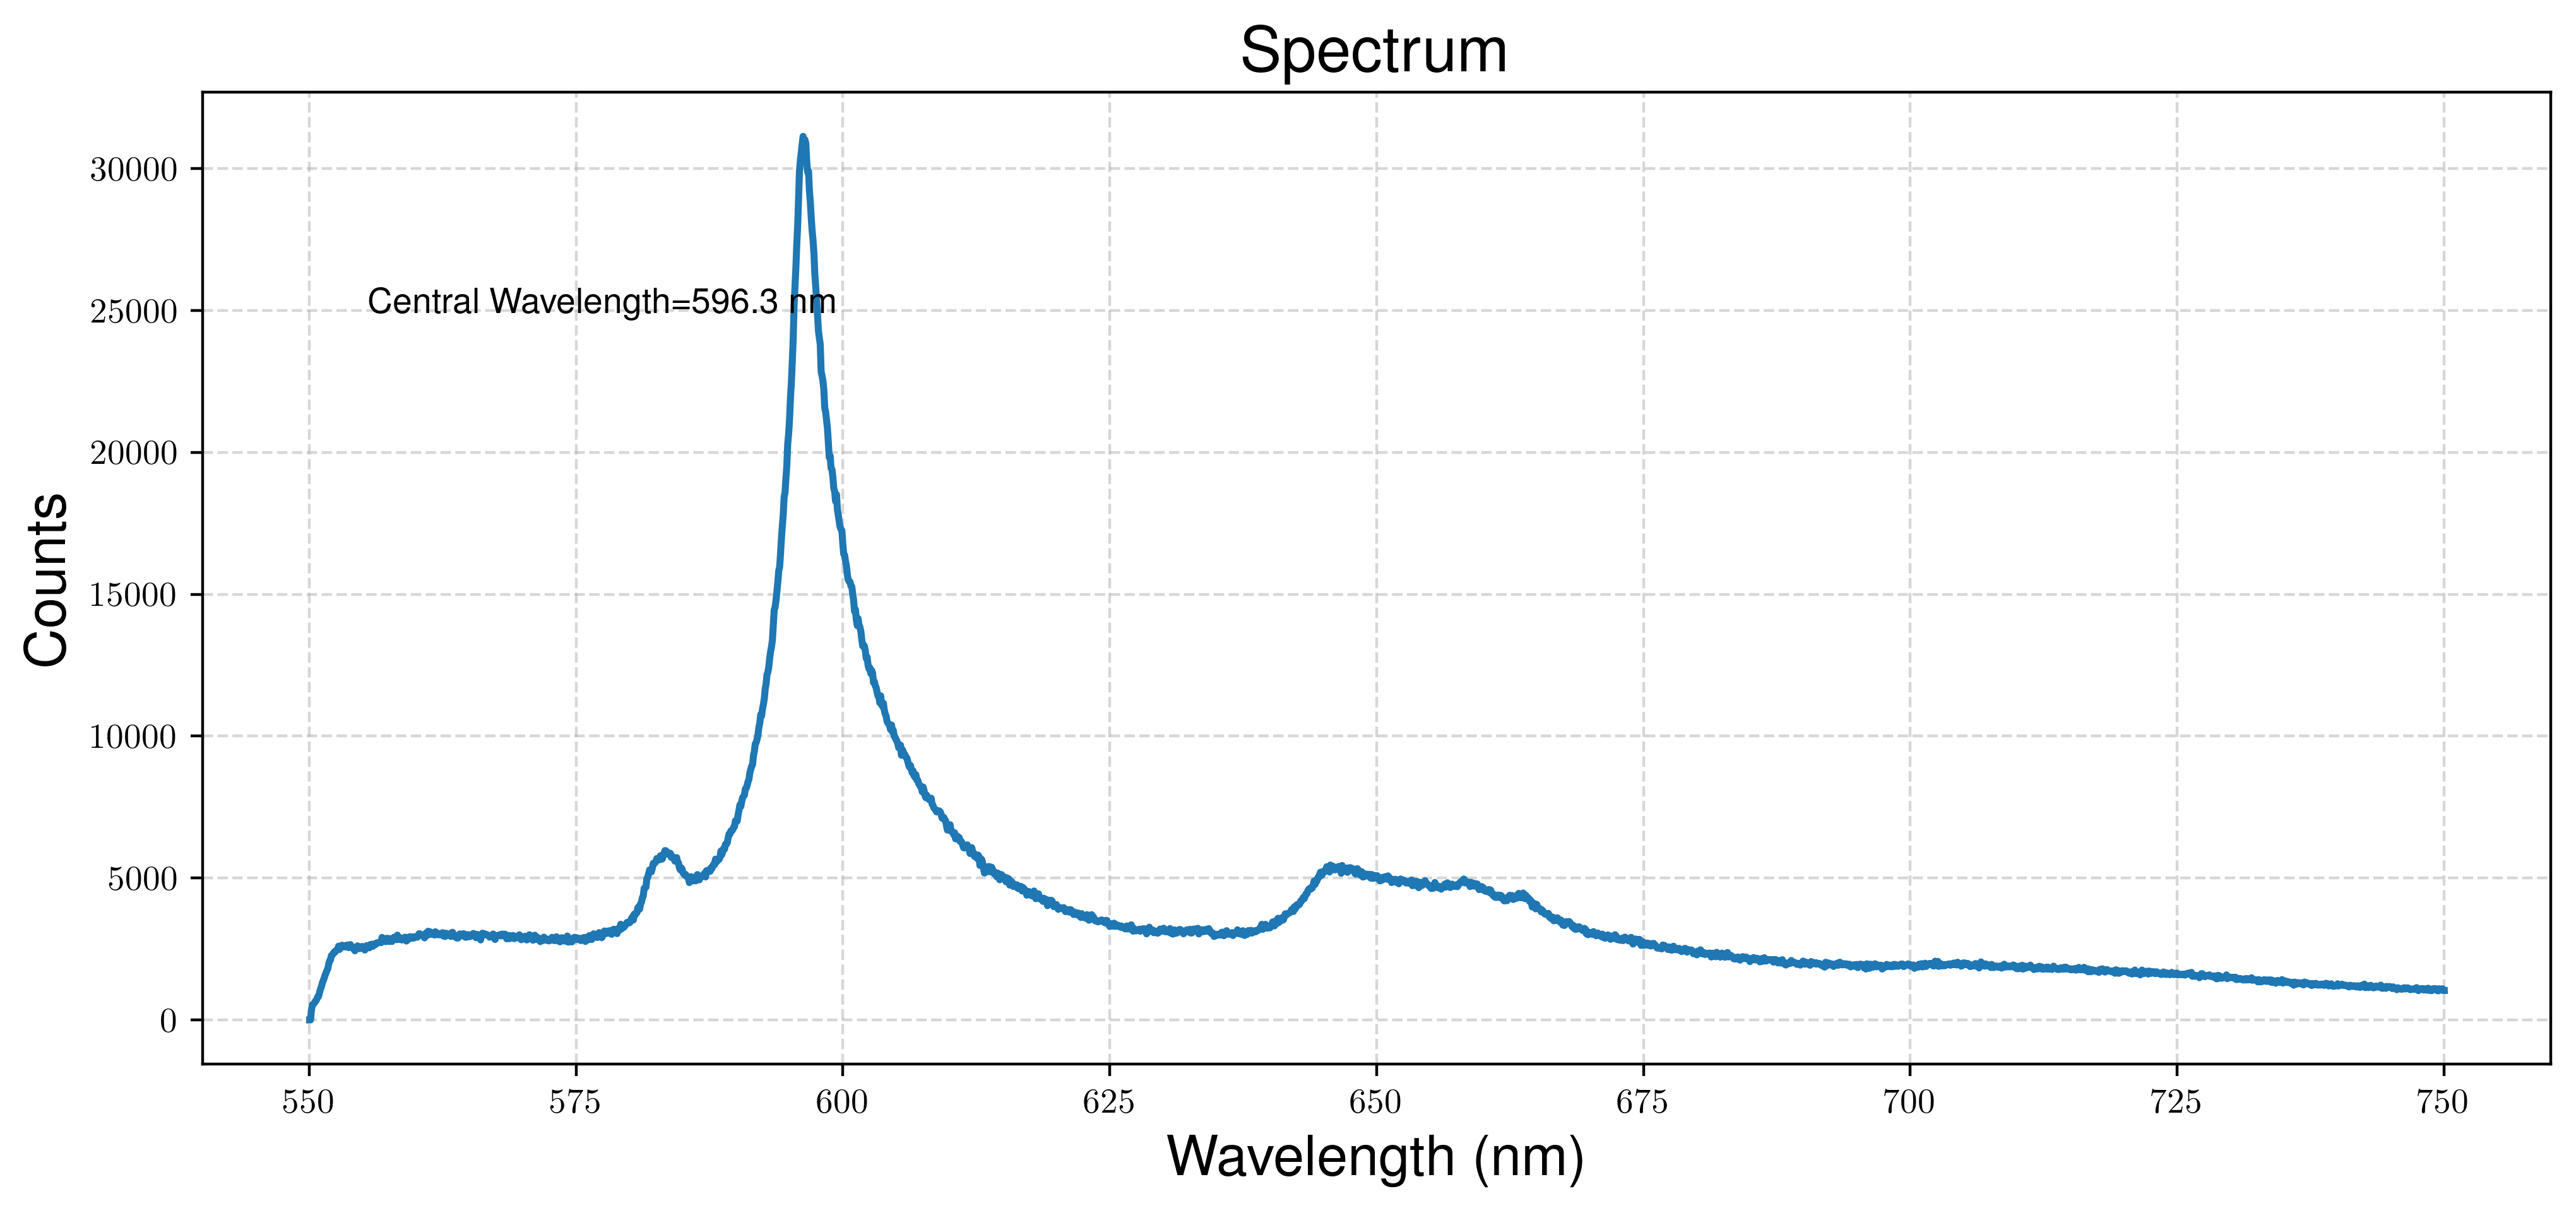

In [16]:
# Spectrum
uploaded = files.upload()
open_file2b = list(uploaded.keys())[0]
print(open_file2b)

## Visualization of the uploaded data ##

# Load in data
wav2b, counts2b, _, _, _, _ = np.loadtxt(open_file2b, delimiter=',', unpack = True, skiprows=1)

# Find peak
max_count_ind2b = np.argmax(counts2b)
peak_wav2b, peak_count2b = wav2b[max_count_ind2b], counts2b[max_count_ind2b]

font = 'serif'
plt.figure(figsize=(12, 5), dpi=400)
plt.plot(wav2b, counts2b, linewidth=2)
plt.text(min(wav2b)*1.01, max(counts2b)*0.8, f'Central Wavelength={peak_wav2b:.1f} nm', fontname=font)


# Labels and title
plt.title("Spectrum", fontsize=18, fontname=font)
plt.xlabel("Wavelength (nm)", fontsize=16, fontname=font)
plt.ylabel("Counts", fontsize=16, fontname=font)

# Grid and style
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

Saving F3-597-25.07.2025-13.38-G.csv to F3-597-25.07.2025-13.38-G.csv
F3-597-25.07.2025-13.38-G.csv


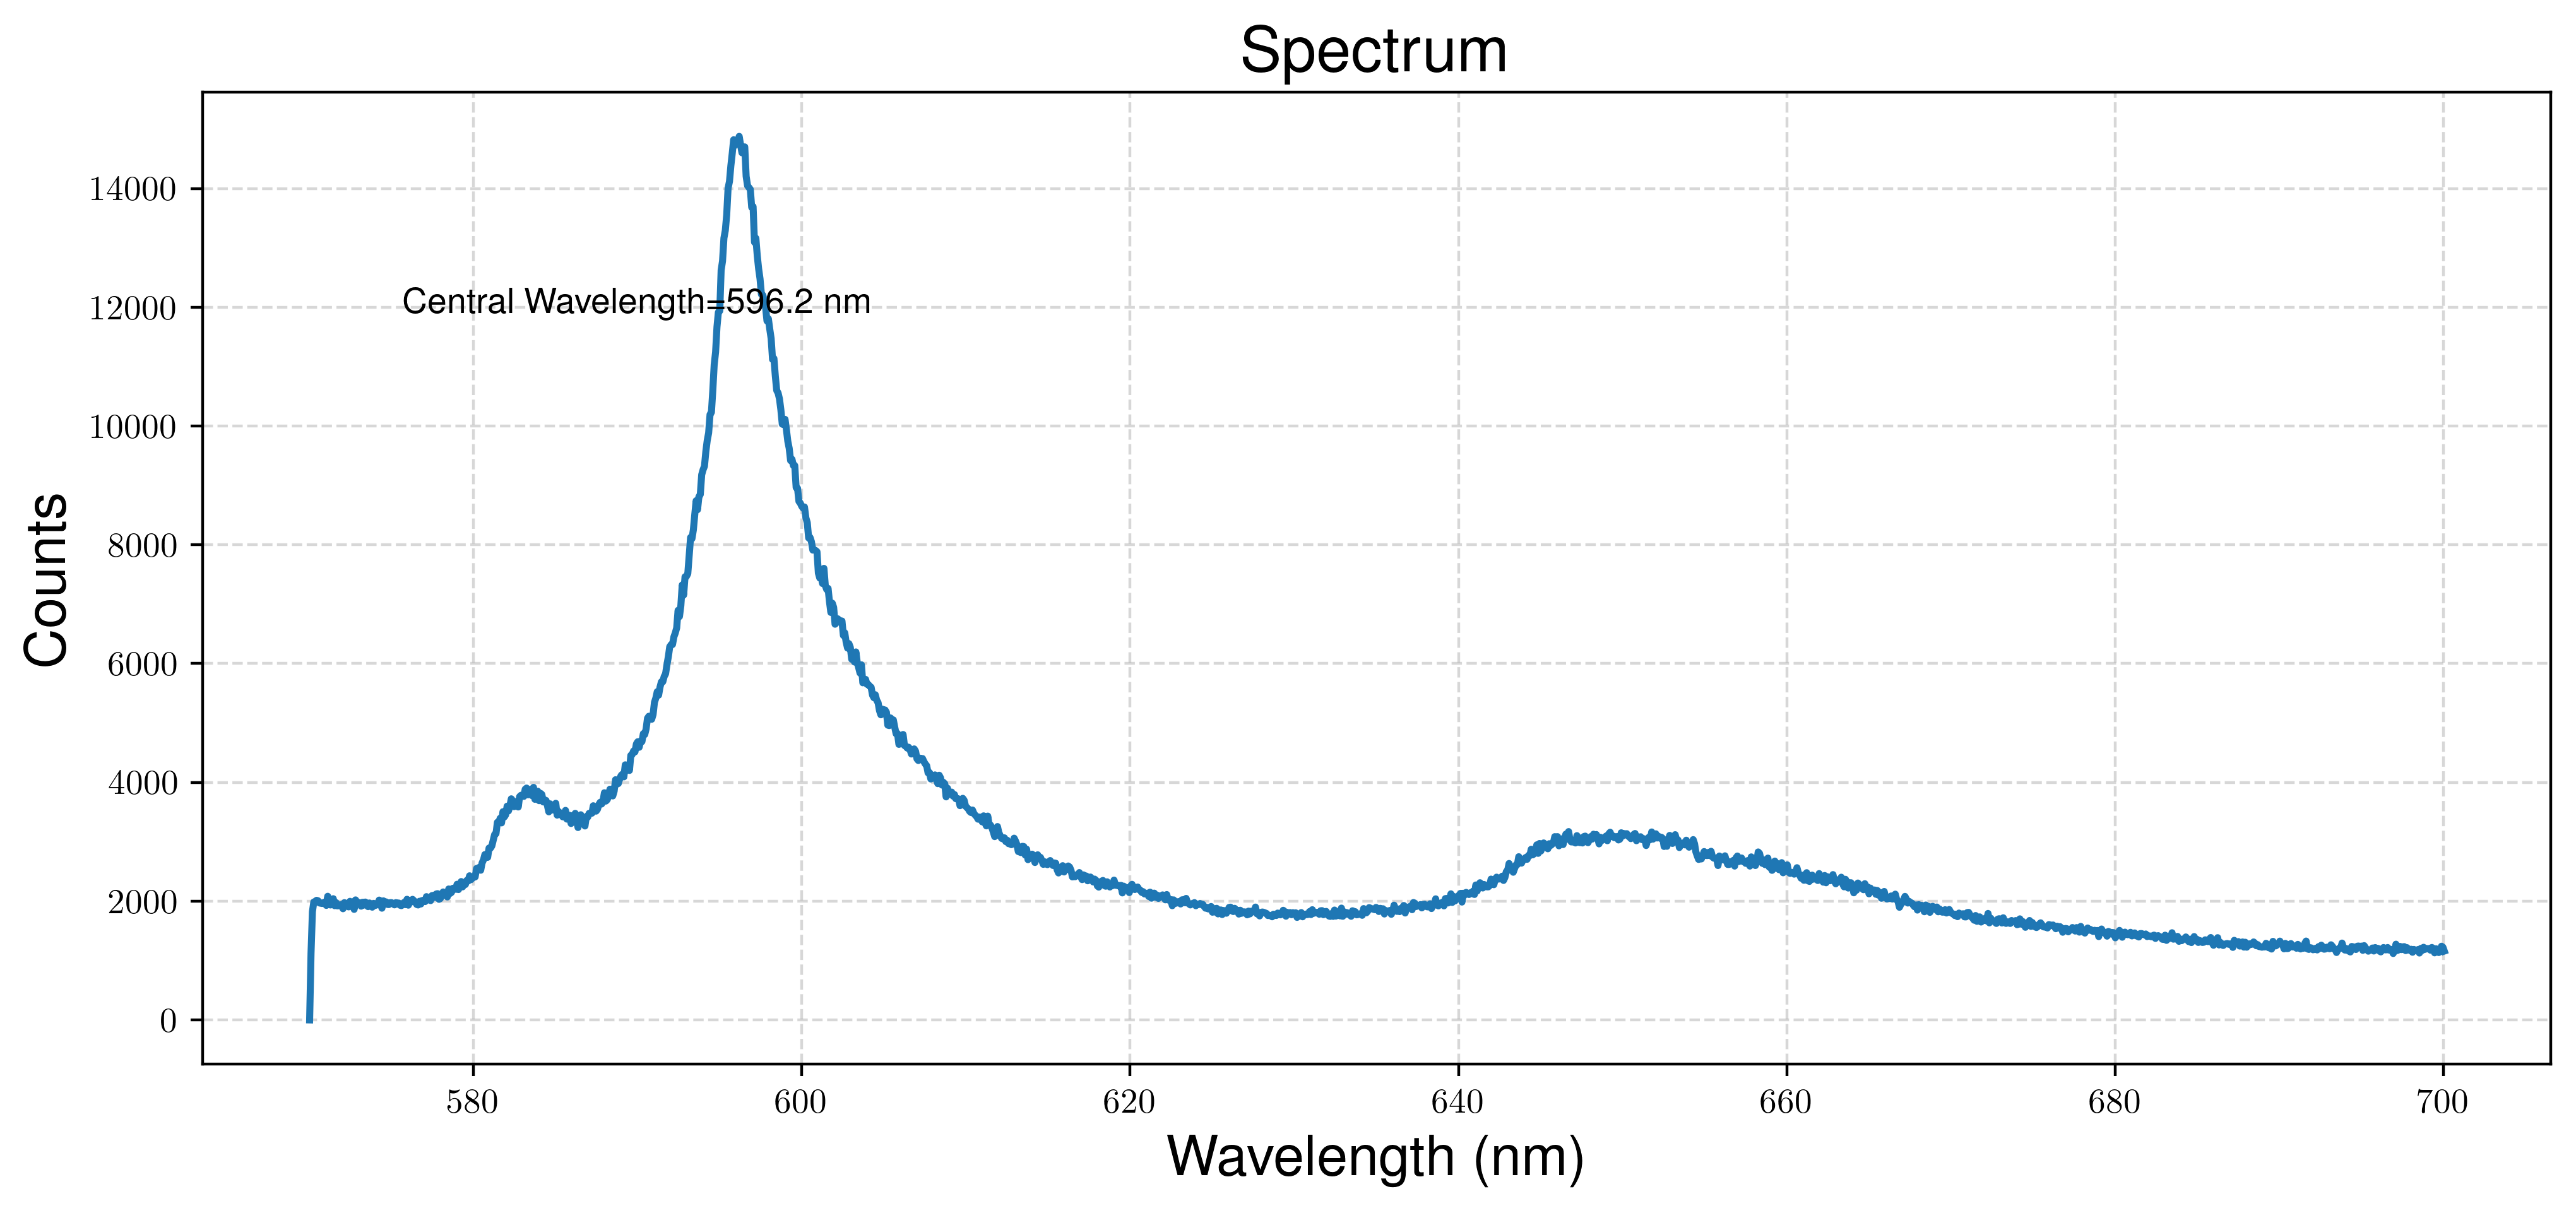

In [17]:
# Spectrum
uploaded = files.upload()
open_file2g = list(uploaded.keys())[0]
print(open_file2g)

## Visualization of the uploaded data ##

# Load in data
wav2g, counts2g, _, _, _, _ = np.loadtxt(open_file2g, delimiter=',', unpack = True, skiprows=1)

# Find peak
max_count_ind2g = np.argmax(counts2g)
peak_wav2g, peak_count2g = wav2g[max_count_ind2g], counts2g[max_count_ind2g]

font = 'serif'
plt.figure(figsize=(12, 5), dpi=400)
plt.plot(wav2g, counts2g, linewidth=2)
plt.text(min(wav2g)*1.01, max(counts2g)*0.8, f'Central Wavelength={peak_wav2g:.1f} nm', fontname=font)


# Labels and title
plt.title("Spectrum", fontsize=18, fontname=font)
plt.xlabel("Wavelength (nm)", fontsize=16, fontname=font)
plt.ylabel("Counts", fontsize=16, fontname=font)

# Grid and style
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

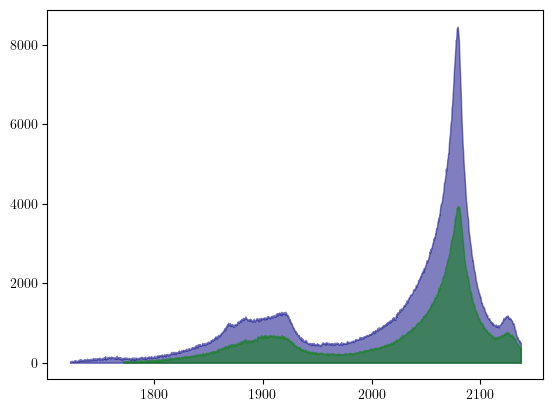

In [18]:
wav_min2 = 580
wav_max2 =720
wav_ROI2b = wav2b[np.abs(wav2b - wav_min2).argmin():np.abs(wav2b - wav_max2).argmin()]
counts_wav_ROI2b = counts2b[np.abs(wav2b - wav_min2).argmin():np.abs(wav2b - wav_max2).argmin()]

#Background correction
counts_wav_ROI2b = counts_wav_ROI2b-min(counts_wav_ROI2b)


# Find peak
max_count_ind2b = np.argmax(counts_wav_ROI2b)
peak_wav2b, peak_count2b = wav_ROI2b[max_count_ind2b], counts_wav_ROI2b[max_count_ind2b]
def nm_to_meV(wavelength_nm):
    return 1.23984e6 / wavelength_nm

energy_ROI2b = [nm_to_meV(wl) for wl in wav_ROI2b]
detuning_ROI2b = energy_ROI2b - energy_ROI2b[max_count_ind2b]
#counts_ROI = counts_wav_ROI
counts_ROI2b = [counts_wav_ROI2b[i]*1.23984e6/(energy_ROI2b[i]**2) for i in range(len(counts_wav_ROI2b))] # Jacobian correction


wav_ROI2g = wav2g[np.abs(wav2g - wav_min2).argmin():np.abs(wav2g - wav_max2).argmin()]
counts_wav_ROI2g = counts2g[np.abs(wav2g - wav_min2).argmin():np.abs(wav2g - wav_max2).argmin()]

# Background correction
counts_wav_ROI2g = counts_wav_ROI2g - min(counts_wav_ROI2g)

# Find peak
max_count_ind2g = np.argmax(counts_wav_ROI2g)
peak_wav2g, peak_count2g = wav_ROI2g[max_count_ind2g], counts_wav_ROI2g[max_count_ind2g]

energy_ROI2g = [nm_to_meV(wl2) for wl2 in wav_ROI2g]
detuning_ROI2g = energy_ROI2g - energy_ROI2g[max_count_ind2g]

# counts_ROI2 = counts_wav_ROI2
counts_ROI2g = [counts_wav_ROI2g[i] * 1.23984e6 / (energy_ROI2g[i]**2) for i in range(len(counts_wav_ROI2g))]  # Jacobian correction


plt.fill_between(energy_ROI2b, counts_ROI2b, color = 'navy', alpha = 0.5)
plt.fill_between(energy_ROI2g, counts_ROI2g, color = 'green', alpha = 0.5)
#plt.plot(wav2, counts2)

#plt.xlim(wav_min,wav_max)

Text(0, 0.5, '\\textbf{Visibility}')

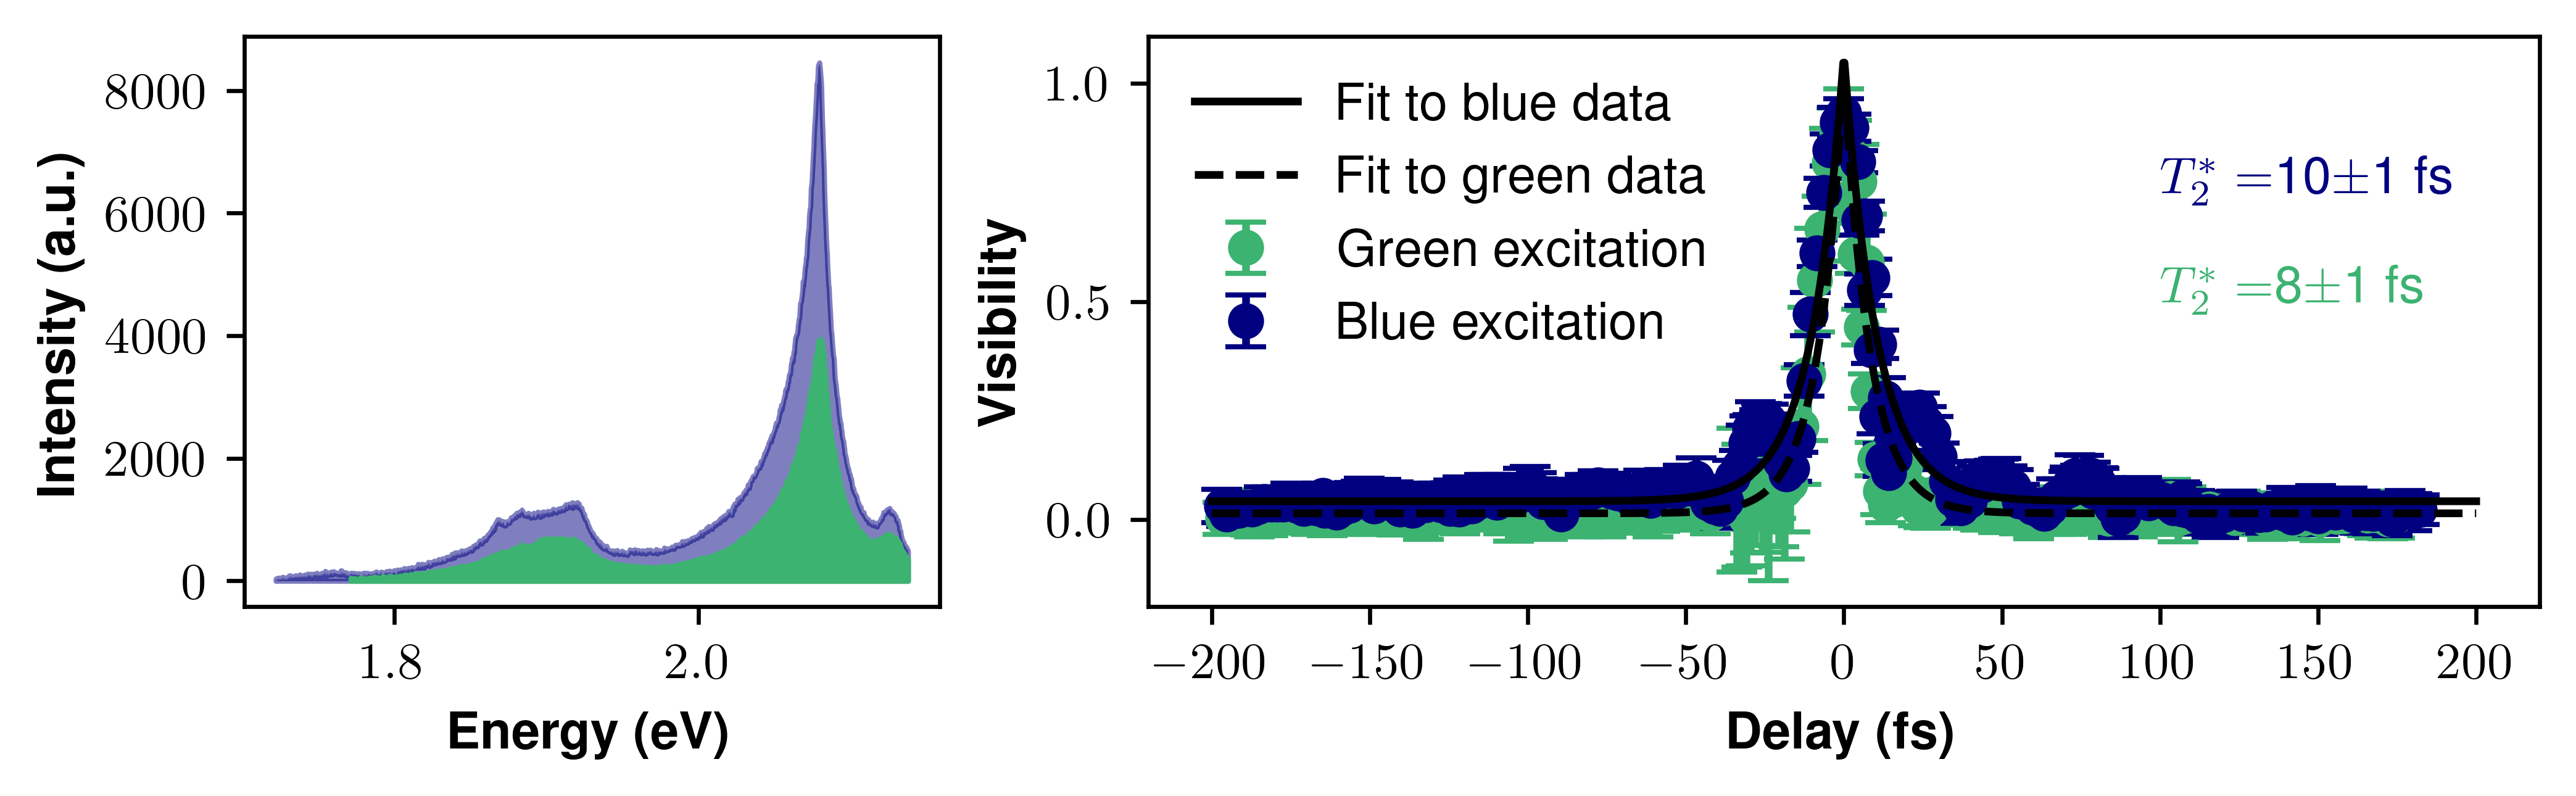

In [19]:
fig, axs = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(8, 2),
    dpi=600,
    gridspec_kw={'width_ratios': [1, 2]}  # izquierda = 1, derecha = 2
)

axs[0].fill_between(np.array(energy_ROI2b)/1000, counts_ROI2b, color='navy', alpha=0.5)
axs[0].fill_between(np.array(energy_ROI2g)/1000, np.array(counts_ROI2g), color='mediumseagreen', alpha=1)
axs[0].set_xlabel(r'\textbf{Energy (eV)}')
axs[0].set_ylabel(r'\textbf{Intensity (a.u.)}')

axs[1].errorbar(loaded_data_2G["Delay (fs)"],loaded_data_2G["Visibility"], loaded_data_2G["Error in visibility"],marker = 'o',linestyle='none',color = 'mediumseagreen',capsize = 4,label = r'Green excitation')
axs[1].errorbar(loaded_data_2B["Delay (fs)"],loaded_data_2B["Visibility"], loaded_data_2B["Error in visibility"],marker = 'o',linestyle='none',color = 'navy',capsize = 4,label = r'Blue excitation')
axs[1].plot(x_val, modelo_exp(x_val, *popt2b), color='k', linestyle='-', label='Fit to blue data',zorder=3)
axs[1].plot(x_val, modelo_exp(x_val, *popt2g), color='k', linestyle='--', label='Fit to green data',zorder=3)
axs[1].text(100,0.75,r'$T_2^* = $'+f'{int(round(popt2b[1]))}'+r'$\pm$'+ f'{int(np.ceil(pcov2b[1,1]))}' +' fs', color = 'navy')
axs[1].text(100,0.5,r'$T_2^* = $'+f'{int(round(popt2g[1]))}'+r'$\pm$'+ f'{int(np.ceil(pcov2g[1,1]))}' +' fs', color = 'mediumseagreen')
axs[1].legend(frameon=False)
axs[1].set_xlabel(r'\textbf{Delay (fs)}')
axs[1].set_ylabel(r'\textbf{Visibility}')

## Defecto 3

In [20]:
# Visibility
uploaded = files.upload()
data_file_path_visibility_analysed_3b = list(uploaded.keys())[0]
print(data_file_path_visibility_analysed_3b)

# We load the file
with open(data_file_path_visibility_analysed_3b, "rb") as archivo:
    loaded_data_3B = pickle.load(archivo)

delay_3B = loaded_data_3B["Delay (fs)"]
visibility_3B = loaded_data_3B["Visibility"]
std_visbility_3B = loaded_data_3B["Error in visibility"]

Saving 710_blue_1.2mW_noSP.pkl to 710_blue_1.2mW_noSP.pkl
710_blue_1.2mW_noSP.pkl


In [21]:
# Visibility
uploaded = files.upload()
data_file_path_visibility_analysed_3r = list(uploaded.keys())[0]
print(data_file_path_visibility_analysed_3r)

# We load the file
with open(data_file_path_visibility_analysed_3r, "rb") as archivo:
    loaded_data_3R = pickle.load(archivo)

delay_3R = loaded_data_3R["Delay (fs)"]
visibility_3R = loaded_data_3R["Visibility"]
std_visbility_3R = loaded_data_3R["Error in visibility"]

Saving 710_new_red_0.4mW_noSP.pkl to 710_new_red_0.4mW_noSP.pkl
710_new_red_0.4mW_noSP.pkl


In [22]:
# Ajuste con curve_fit
popt3b, pcov3b = curve_fit(modelo_exp, loaded_data_3B["Delay (fs)"],loaded_data_3B["Visibility"], p0=(1, 100, 0))  # p0 son estimaciones iniciales
popt3r, pcov3r = curve_fit(modelo_exp, loaded_data_3R["Delay (fs)"],loaded_data_3R["Visibility"], p0=(1, 10, 0))  # p0 son estimaciones iniciales

Saving blue_spectrum.csv to blue_spectrum.csv
blue_spectrum.csv


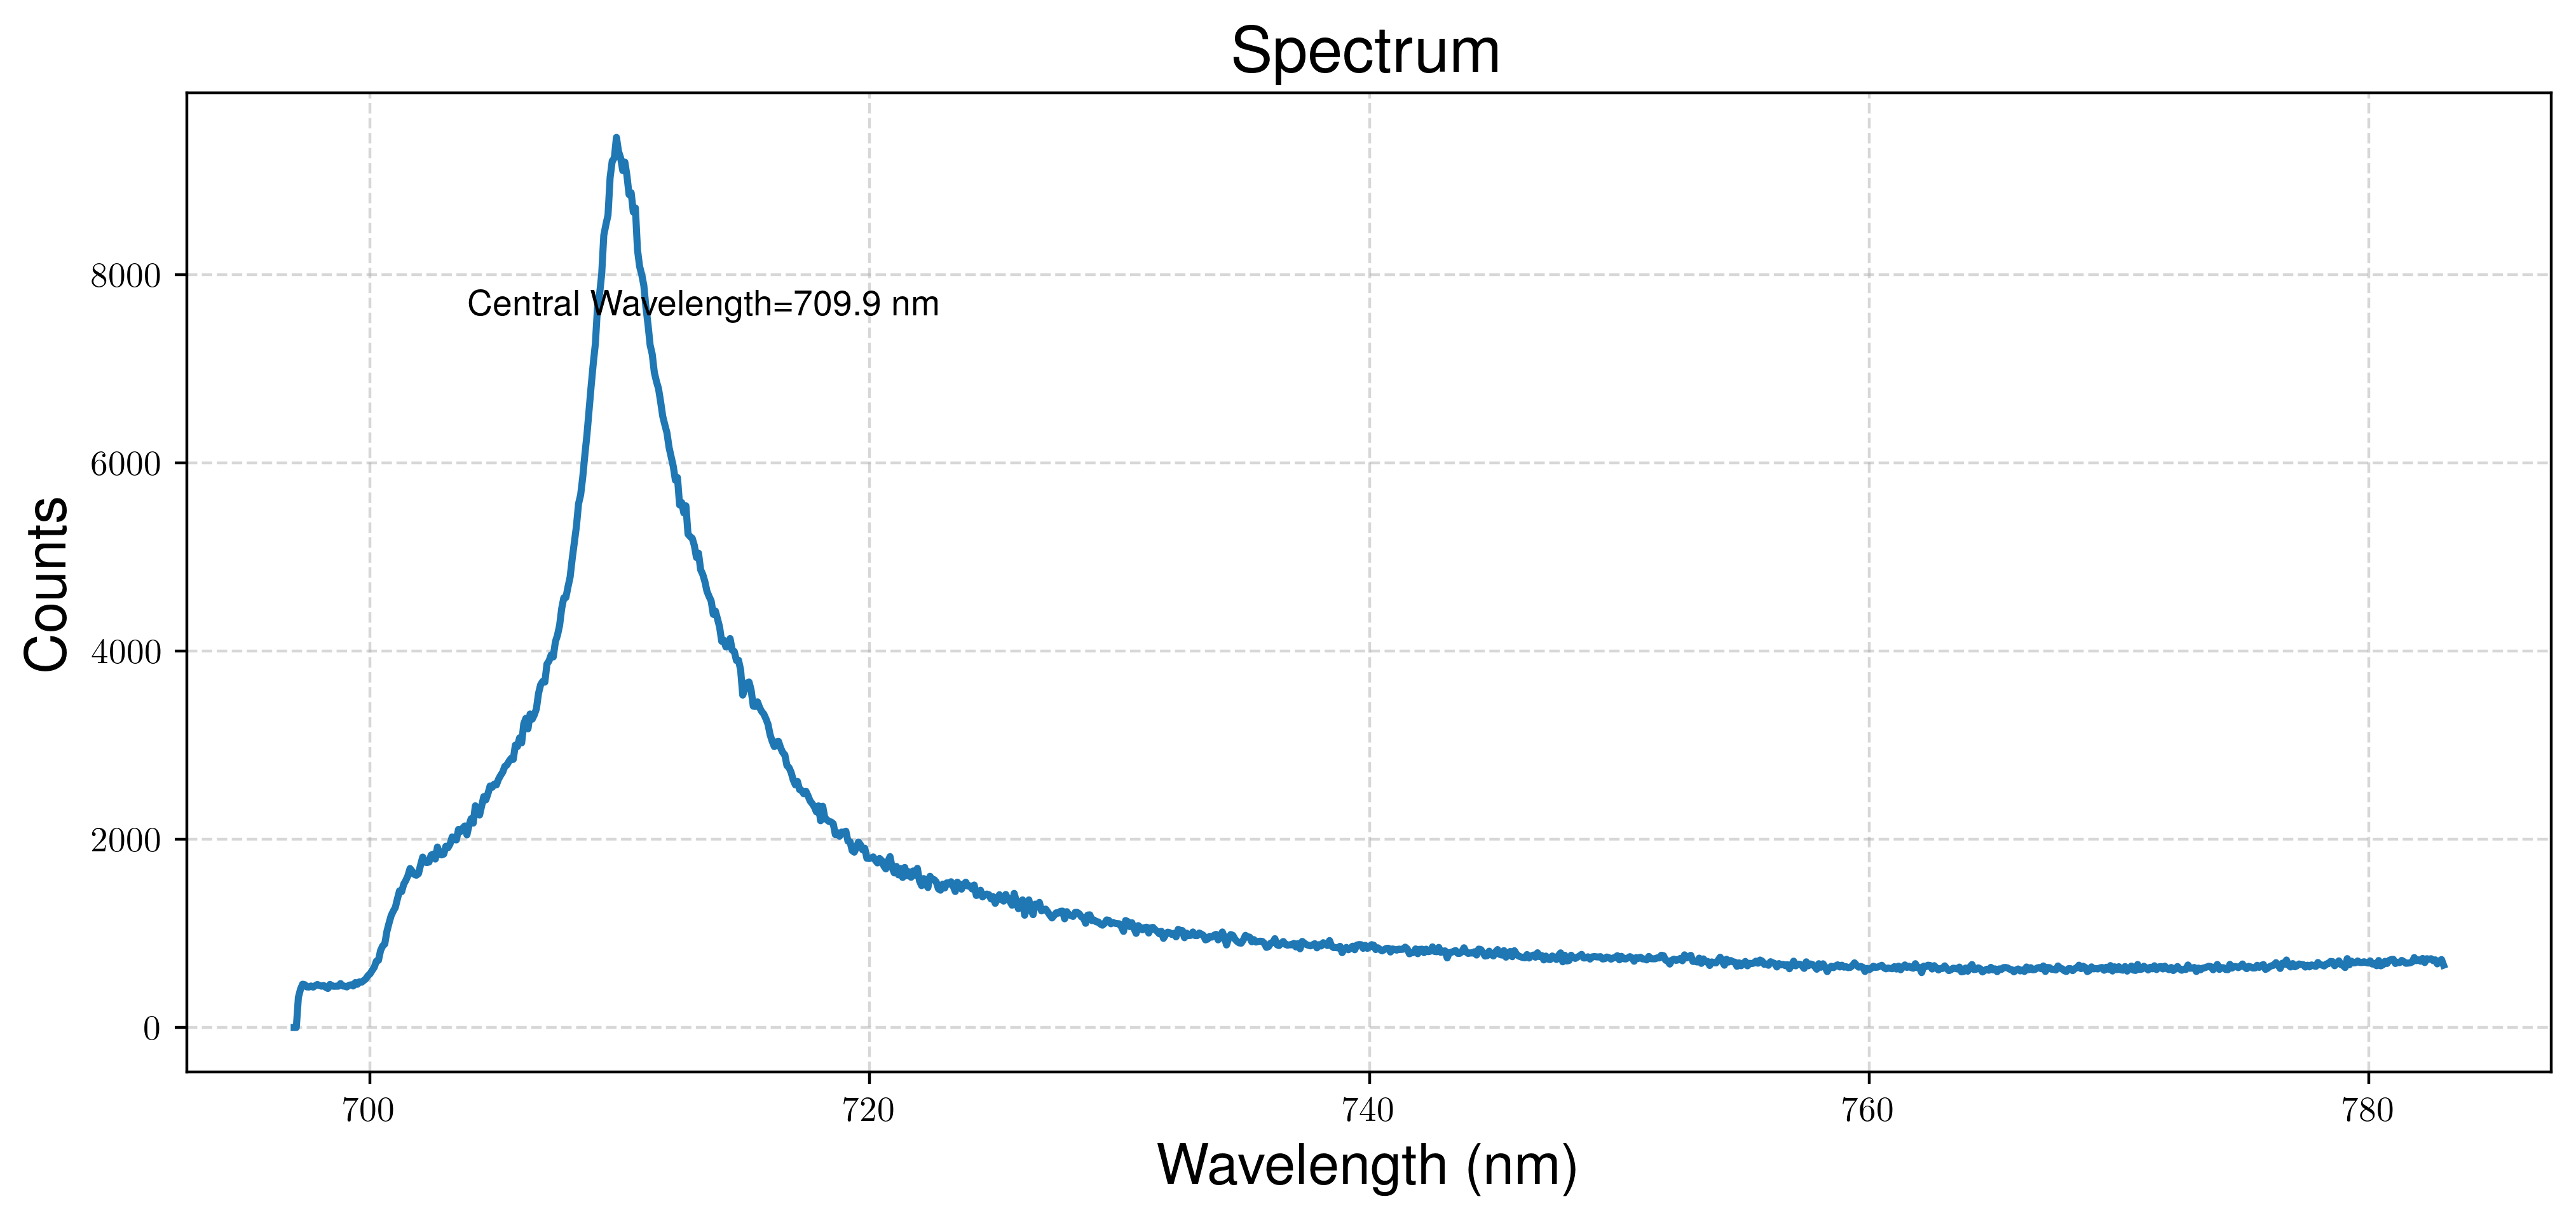

In [24]:
# Spectrum
uploaded = files.upload()
open_file3b = list(uploaded.keys())[0]
print(open_file3b)

## Visualization of the uploaded data ##

# Load in data
wav3b, counts3b, _, _, _, _ = np.loadtxt(open_file3b, delimiter=',', unpack = True, skiprows=1)

# Find peak
max_count_ind3b = np.argmax(counts3b)
peak_wav3b, peak_count3b = wav3b[max_count_ind3b], counts3b[max_count_ind3b]

font = 'serif'
plt.figure(figsize=(12, 5), dpi=400)
plt.plot(wav3b, counts3b, linewidth=2)
plt.text(min(wav3b)*1.01, max(counts3b)*0.8, f'Central Wavelength={peak_wav3b:.1f} nm', fontname=font)


# Labels and title
plt.title("Spectrum", fontsize=18, fontname=font)
plt.xlabel("Wavelength (nm)", fontsize=16, fontname=font)
plt.ylabel("Counts", fontsize=16, fontname=font)

# Grid and style
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

Saving red_spectrum.csv to red_spectrum (1).csv
red_spectrum (1).csv


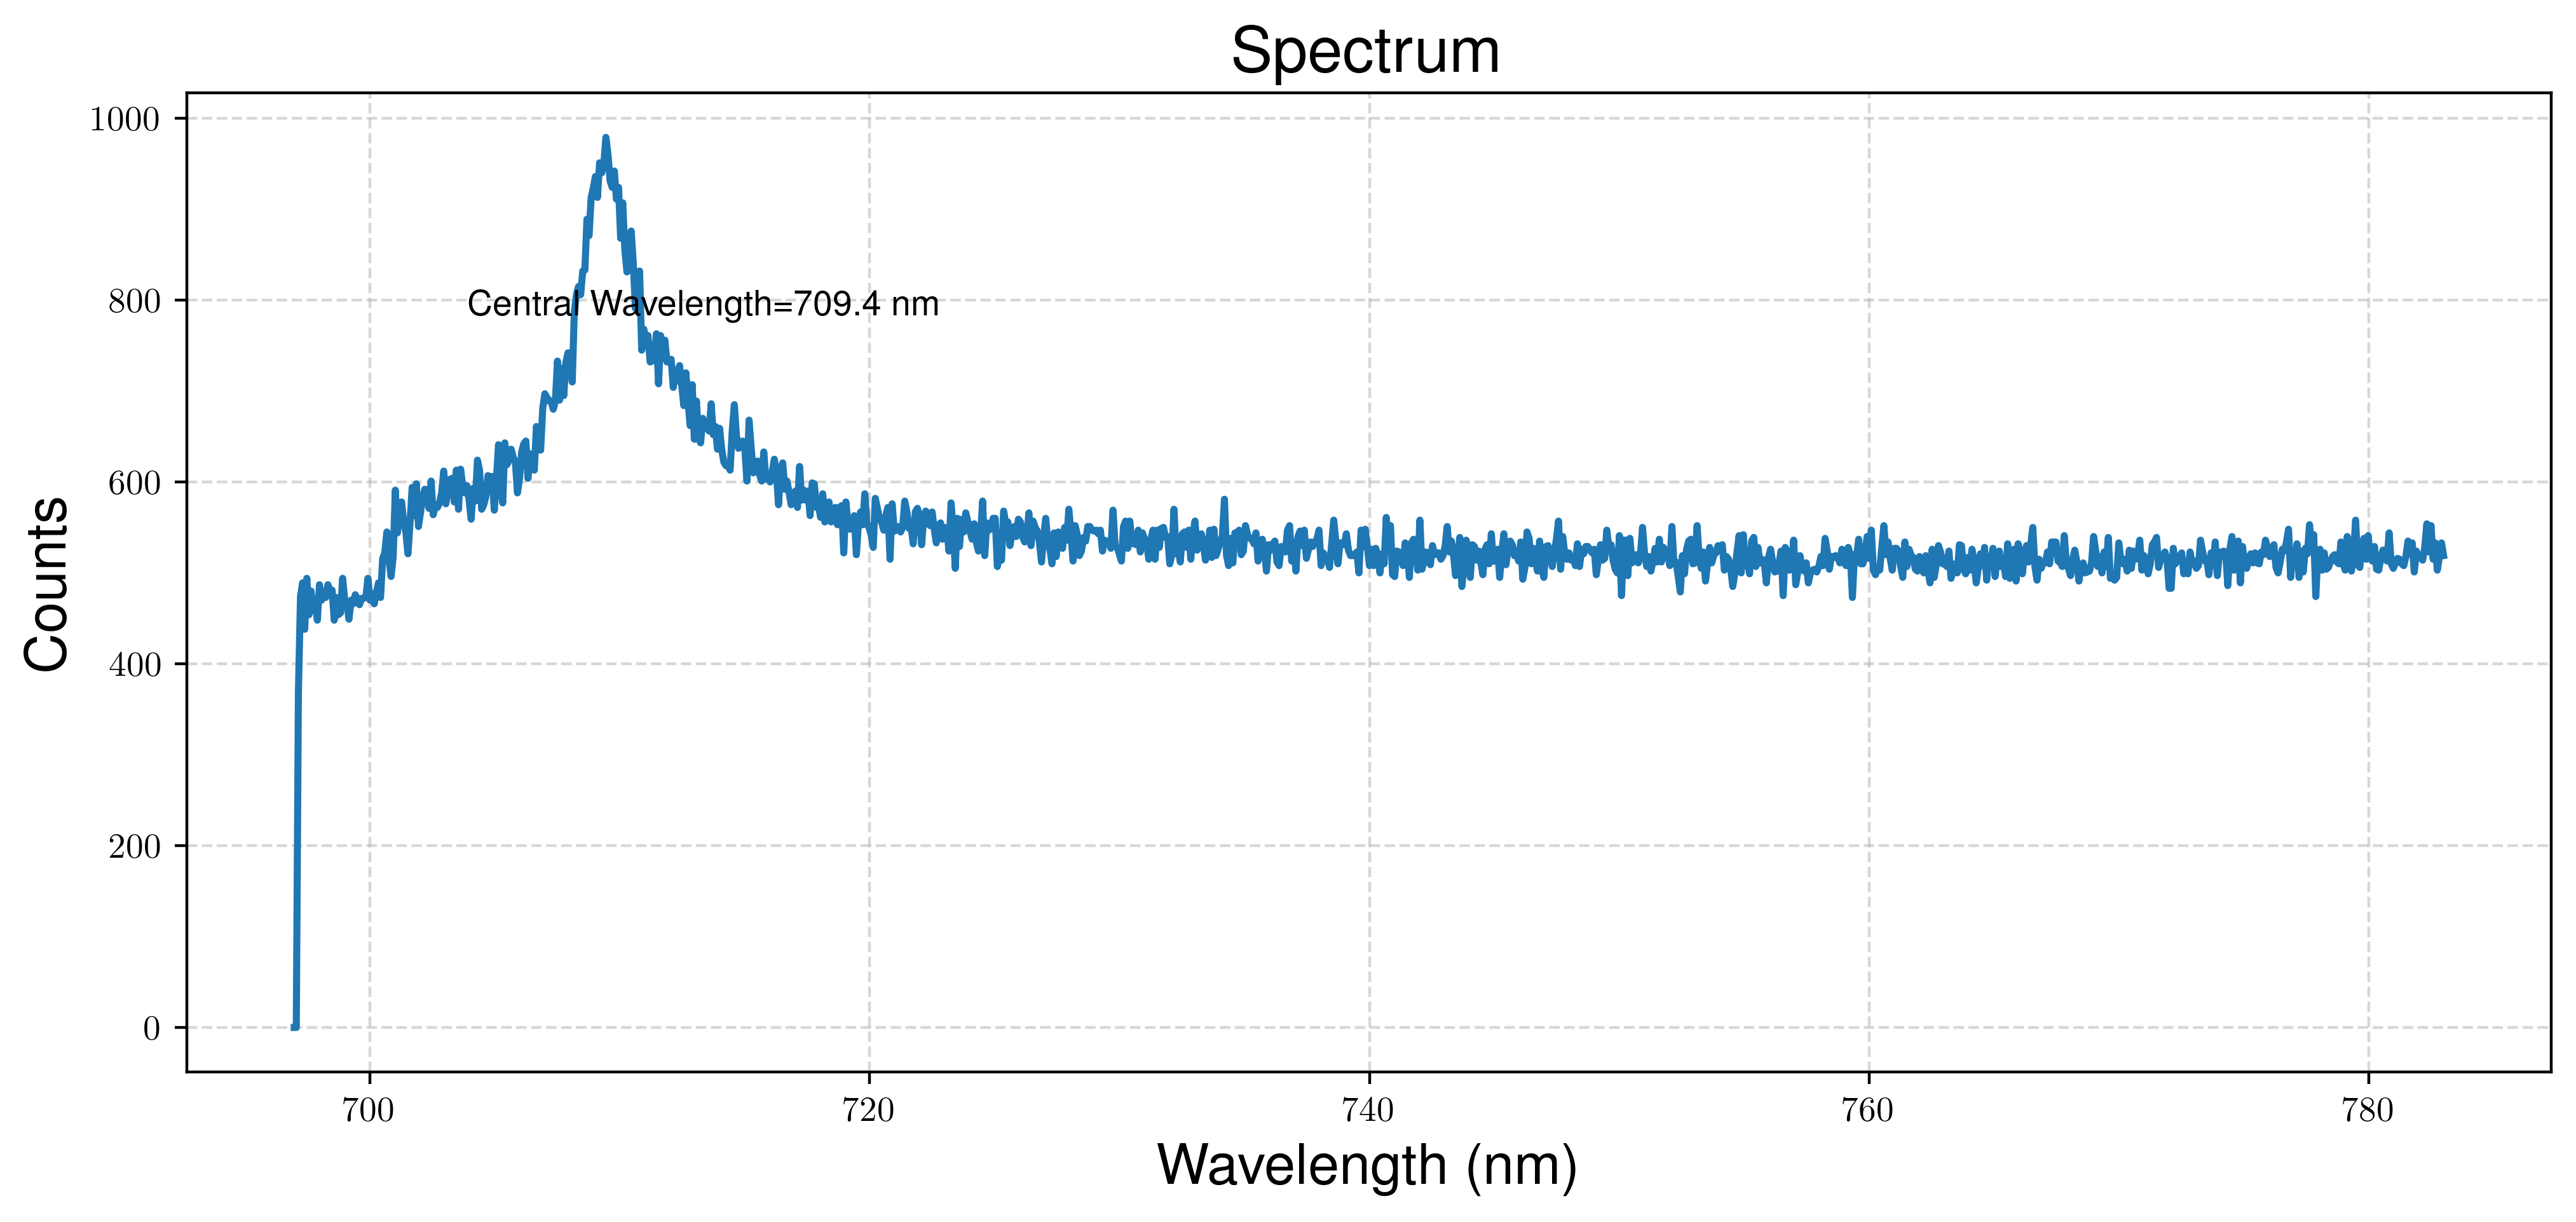

In [25]:
# Spectrum
uploaded = files.upload()
open_file3r = list(uploaded.keys())[0]
print(open_file3r)

## Visualization of the uploaded data ##

# Load in data
wav3r, counts3r, _, _, _, _ = np.loadtxt(open_file3r, delimiter=',', unpack = True, skiprows=1)

# Find peak
max_count_ind3r = np.argmax(counts3r)
peak_wav3r, peak_count3r = wav3r[max_count_ind3r], counts3r[max_count_ind3r]

font = 'serif'
plt.figure(figsize=(12, 5), dpi=400)
plt.plot(wav3r, counts3r, linewidth=2)
plt.text(min(wav3r)*1.01, max(counts3r)*0.8, f'Central Wavelength={peak_wav3r:.1f} nm', fontname=font)


# Labels and title
plt.title("Spectrum", fontsize=18, fontname=font)
plt.xlabel("Wavelength (nm)", fontsize=16, fontname=font)
plt.ylabel("Counts", fontsize=16, fontname=font)

# Grid and style
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

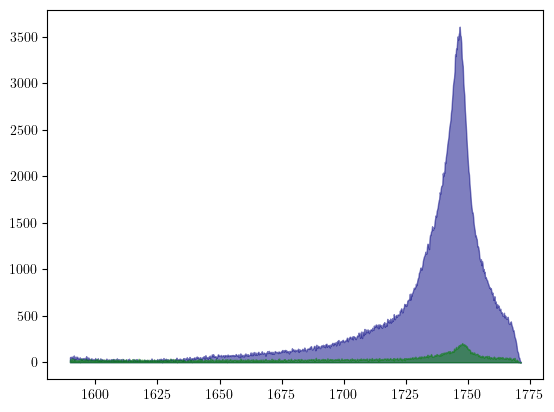

In [26]:
wav_min3 = 700
wav_max3 =780
wav_ROI3b = wav3b[np.abs(wav3b - wav_min3).argmin():np.abs(wav3b - wav_max3).argmin()]
counts_wav_ROI3b = counts3b[np.abs(wav3b - wav_min3).argmin():np.abs(wav3b - wav_max3).argmin()]

#Background correction
counts_wav_ROI3b = counts_wav_ROI3b-min(counts_wav_ROI3b[3:])


# Find peak
max_count_ind3b = np.argmax(counts_wav_ROI3b)
peak_wav3b, peak_count3b = wav_ROI3b[max_count_ind3b], counts_wav_ROI3b[max_count_ind3b]
def nm_to_meV(wavelength_nm):
    return 1.23984e6 / wavelength_nm

energy_ROI3b = [nm_to_meV(wl) for wl in wav_ROI3b]
detuning_ROI3b = energy_ROI3b - energy_ROI3b[max_count_ind3b]
#counts_ROI = counts_wav_ROI
counts_ROI3b = [counts_wav_ROI3b[i]*1.23984e6/(energy_ROI3b[i]**2) for i in range(len(counts_wav_ROI3b))] # Jacobian correction


wav_ROI3r = wav3r[np.abs(wav3r - wav_min3).argmin():np.abs(wav3r - wav_max3).argmin()]
counts_wav_ROI3r = counts3r[np.abs(wav3r - wav_min3).argmin():np.abs(wav3r - wav_max3).argmin()]

# Background correction
counts_wav_ROI3r = counts_wav_ROI3r - min(counts_wav_ROI3r[3:])

# Find peak
max_count_ind3r = np.argmax(counts_wav_ROI3r)
peak_wav3r, peak_count3r = wav_ROI3r[max_count_ind3r], counts_wav_ROI3r[max_count_ind3r]

energy_ROI3r = [nm_to_meV(wl2) for wl2 in wav_ROI3r]
detuning_ROI3r = energy_ROI3r - energy_ROI3r[max_count_ind3r]

# counts_ROI2 = counts_wav_ROI2
counts_ROI3r = [counts_wav_ROI3r[i] * 1.23984e6 / (energy_ROI3r[i]**2) for i in range(len(counts_wav_ROI3r))]  # Jacobian correction


plt.fill_between(energy_ROI3b, counts_ROI3b, color = 'navy', alpha = 0.5)
plt.fill_between(energy_ROI3r, counts_ROI3r, color = 'green', alpha = 0.5)
#plt.plot(wav2, counts2)

#plt.xlim(wav_min,wav_max)

Text(0, 0.5, '\\textbf{Visibility}')

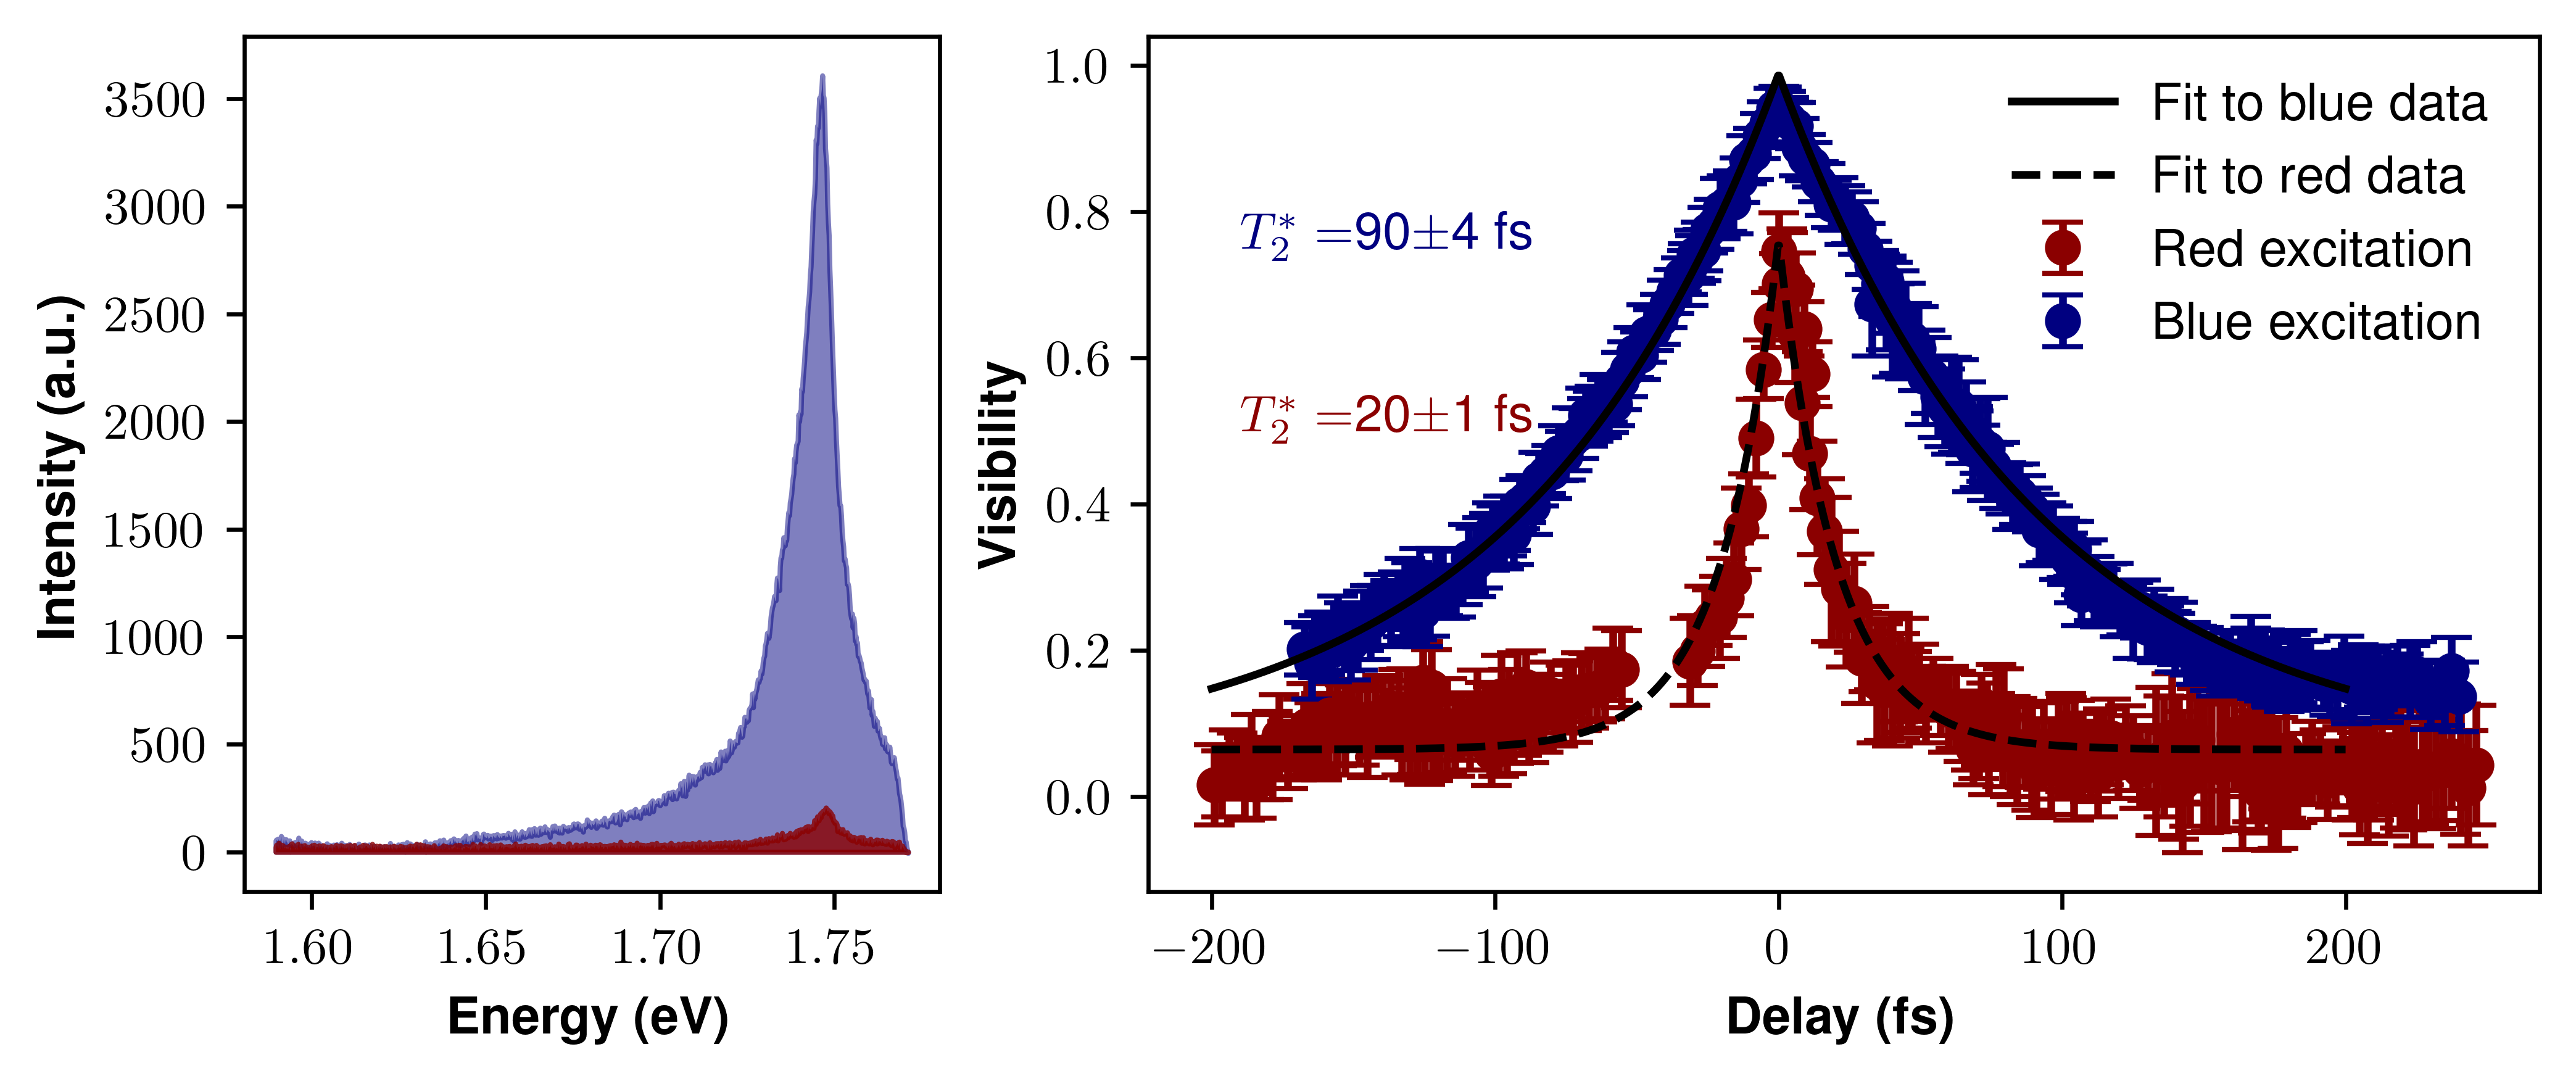

In [27]:
fig, axs = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(8, 3),
    dpi=600,
    gridspec_kw={'width_ratios': [1, 2]}  # izquierda = 1, derecha = 2
)

axs[0].fill_between(np.array(energy_ROI3b)/1000, counts_ROI3b, color='navy', alpha=0.5)
axs[0].fill_between(np.array(energy_ROI3r)/1000, np.array(counts_ROI3r), color='darkred', alpha=0.8)
axs[0].set_xlabel(r'\textbf{Energy (eV)}')
axs[0].set_ylabel(r'\textbf{Intensity (a.u.)}')

axs[1].errorbar(loaded_data_3R["Delay (fs)"],loaded_data_3R["Visibility"], loaded_data_3R["Error in visibility"],marker = 'o',linestyle='none',color = 'darkred',capsize = 4,label = r'Red excitation')
axs[1].errorbar(loaded_data_3B["Delay (fs)"],loaded_data_3B["Visibility"], loaded_data_3B["Error in visibility"],marker = 'o',linestyle='none',color = 'navy',capsize = 4,label = r'Blue excitation')
axs[1].plot(x_val, modelo_exp(x_val, *popt3b), color='k', linestyle='-', label='Fit to blue data',zorder=3)
axs[1].plot(x_val, modelo_exp(x_val, *popt3r), color='k', linestyle='--', label='Fit to red data',zorder=3)
axs[1].text(-190,0.75,r'$T_2^* = $'+f'{int(round(popt3b[1]))}'+r'$\pm$'+ f'{int(np.ceil(pcov3b[1,1]))}' +' fs', color = 'navy')
axs[1].text(-190,0.5,r'$T_2^* = $'+f'{int(round(popt3r[1]))}'+r'$\pm$'+ f'{int(round(pcov3r[1,1]))}' +' fs', color = 'darkred')
axs[1].legend(frameon=False)
axs[1].set_xlabel(r'\textbf{Delay (fs)}')
axs[1].set_ylabel(r'\textbf{Visibility}')

## We put all together

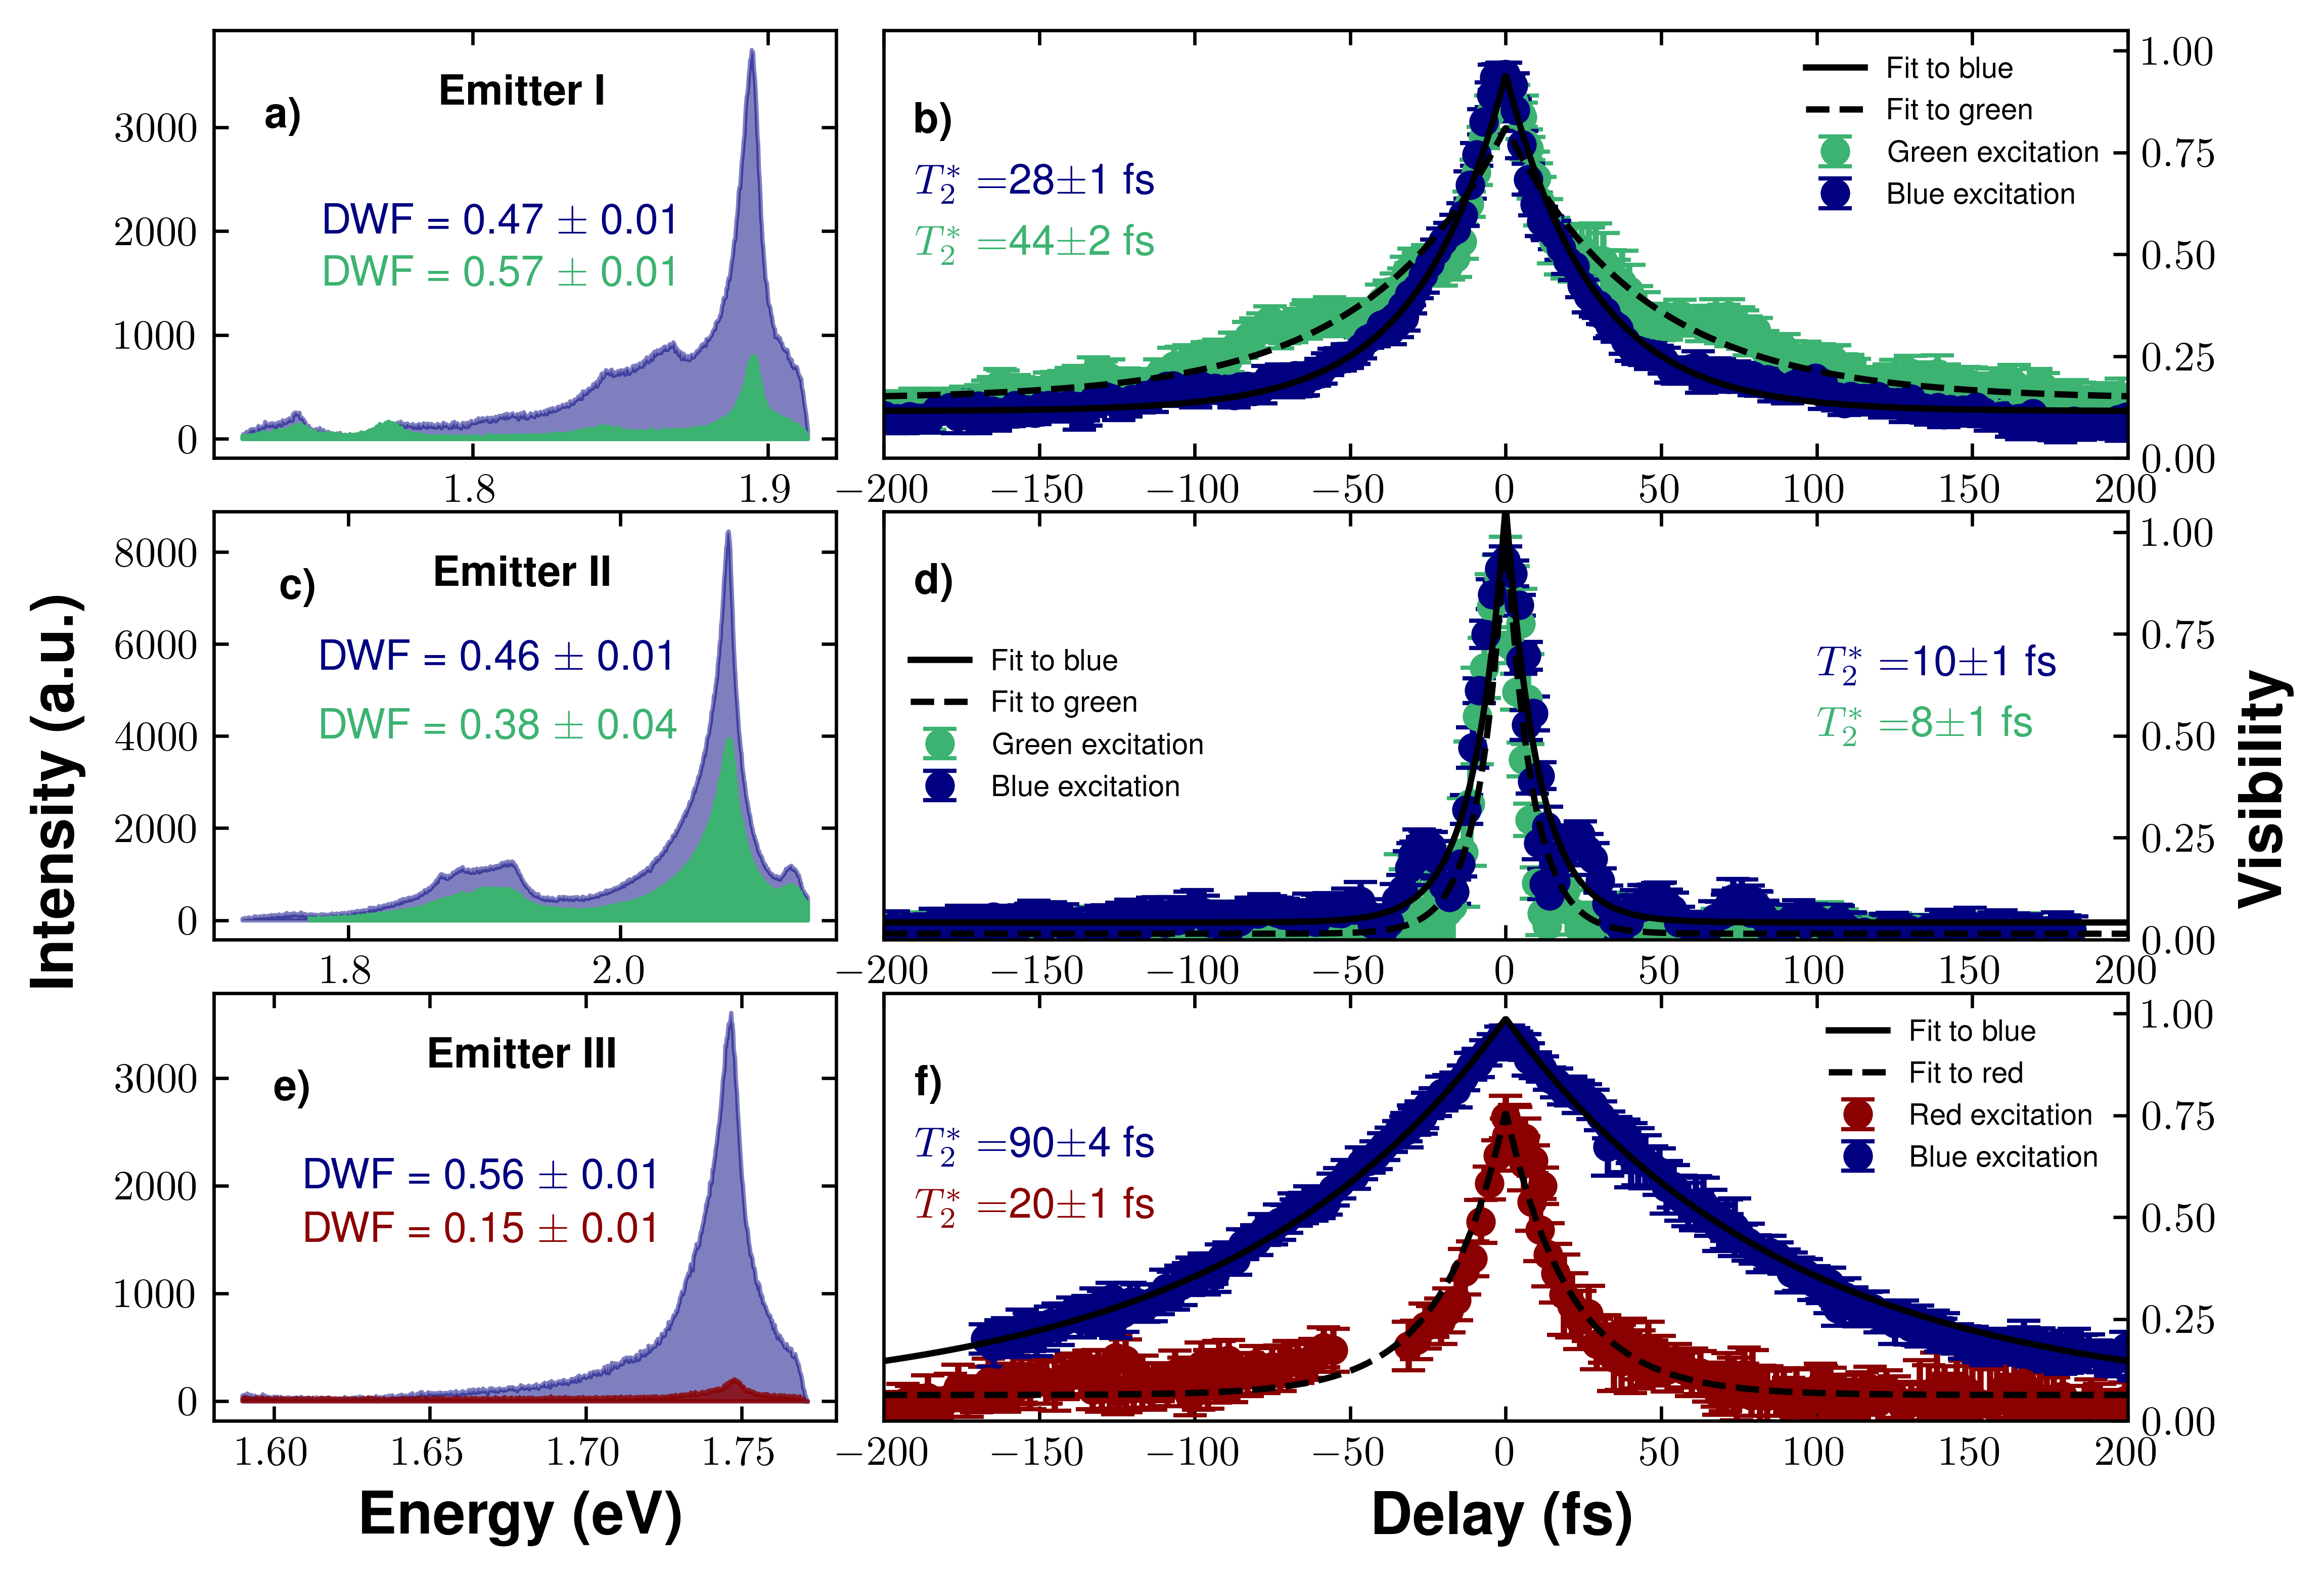

In [28]:
fig, axs = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(7, 5),
    dpi=600,
    gridspec_kw={'width_ratios': [1, 2]}  # izquierda = 1, derecha = 2
)

# --- Defect 1 ---
axs[0,0].fill_between(np.array(energy_ROI)/1000, counts_ROI, color='navy', alpha=0.5)
axs[0,0].fill_between(np.array(energy_ROI2)/1000, np.array(counts_ROI2), color='mediumseagreen', alpha=1)
axs[0,0].text(1.75,2000, r"DWF = 0.47 $\pm$ 0.01",color = "navy")
axs[0,0].text(1.75,1500, r"DWF = 0.57 $\pm$ 0.01",color = "mediumseagreen")
axs[0,0].text(1.73,3000,r'\textbf{a)}')
axs[0,0].text(0.5, 0.85, r'\textbf{Emitter I}', transform=axs[0,0].transAxes,
        ha='center', va='center')

axs[0,1].errorbar(loaded_data_G["Delay (fs)"],loaded_data_G["Visibility"], loaded_data_G["Error in visibility"],
                  marker = 'o',linestyle='none',color = 'mediumseagreen',capsize = 4,
                  label = r'Green excitation')
axs[0,1].errorbar(loaded_data_B["Delay (fs)"],loaded_data_B["Visibility"], loaded_data_B["Error in visibility"],
                  marker = 'o',linestyle='none',color = 'navy',capsize = 4,
                  label = r'Blue excitation')
axs[0,1].text(-190,0.65,r'$T_2^* = $'+f'{int(round(poptb[1]))}'+r'$\pm$'+ f'{int(np.ceil(pcovb[1,1]))}' +' fs', color = 'navy')
axs[0,1].text(-190,0.5,r'$T_2^* = $'+f'{int(round(poptg[1]))}'+r'$\pm$'+ f'{int(round(pcovg[1,1]))}' +' fs', color = 'mediumseagreen')
axs[0,1].plot(x_val, modelo_exp(x_val, *poptb), color='k', linestyle='-', label='Fit to blue',zorder=3)
axs[0,1].plot(x_val, modelo_exp(x_val, *poptg), color='k', linestyle='--', label='Fit to green',zorder=3)
axs[0,1].legend(frameon=False,fontsize=7)
axs[0,1].text(-190, 0.8, r'\textbf{b)}')
axs[0,1].set_ylim(0,1.05)
axs[0,1].set_xlim(-200,200)

# --- Defect 2 ---
axs[1,0].fill_between(np.array(energy_ROI2b)/1000, counts_ROI2b, color='navy', alpha=0.5)
axs[1,0].fill_between(np.array(energy_ROI2g)/1000, np.array(counts_ROI2g), color='mediumseagreen', alpha=1)
axs[1,0].text(1.78,5500, r"DWF = 0.46 $\pm$ 0.01",color = "navy")
axs[1,0].text(1.78,4000, r"DWF = 0.38 $\pm$ 0.04",color = "mediumseagreen")
axs[1,0].text(1.75,7000,r'\textbf{c)}')
axs[1,0].text(0.5, 0.85, r'\textbf{Emitter II}', transform=axs[1,0].transAxes,
        ha='center', va='center')


axs[1,1].errorbar(loaded_data_2G["Delay (fs)"],loaded_data_2G["Visibility"], loaded_data_2G["Error in visibility"],
                  marker = 'o',linestyle='none',color = 'mediumseagreen',capsize = 4,
                  label = r'Green excitation')
axs[1,1].errorbar(loaded_data_2B["Delay (fs)"],loaded_data_2B["Visibility"], loaded_data_2B["Error in visibility"],
                  marker = 'o',linestyle='none',color = 'navy',capsize = 4,
                  label = r'Blue excitation')
axs[1,1].plot(x_val, modelo_exp(x_val, *popt2b), color='k', linestyle='-', label='Fit to blue',zorder=3)
axs[1,1].plot(x_val, modelo_exp(x_val, *popt2g), color='k', linestyle='--', label='Fit to green',zorder=3)
axs[1,1].text(100,0.65,r'$T_2^* = $'+f'{int(round(popt2b[1]))}'+r'$\pm$'+ f'{int(np.ceil(pcov2b[1,1]))}' +' fs', color = 'navy')
axs[1,1].text(100,0.5,r'$T_2^* = $'+f'{int(round(popt2g[1]))}'+r'$\pm$'+ f'{int(np.ceil(pcov2g[1,1]))}' +' fs', color = 'mediumseagreen')
axs[1,1].legend(frameon=False,fontsize=7)
axs[1,1].text(-190, 0.85, r'\textbf{d)}')
# axs[1,1].set_xlabel(r'\textbf{Delay (fs)}')
axs[1,1].set_ylim(0,1.05)
axs[1,1].set_xlim(-200,200)

# --- Defect 3 ---
axs[2,0].fill_between(np.array(energy_ROI3b)/1000, counts_ROI3b, color='navy', alpha=0.5)
axs[2,0].fill_between(np.array(energy_ROI3r)/1000, np.array(counts_ROI3r), color='darkred', alpha=0.8)
axs[2,0].text(1.61,2000, r"DWF = 0.56 $\pm$ 0.01",color = "navy")
axs[2,0].text(1.61,1500, r"DWF = 0.15 $\pm$ 0.01",color = "darkred")
axs[2,0].set_xlabel(r'\textbf{Energy (eV)}', fontsize=14)
axs[2,0].text(1.6,2800,r'\textbf{e)}')
axs[2,0].text(0.5, 0.85, r'\textbf{Emitter III}', transform=axs[2,0].transAxes,
        ha='center', va='center')

axs[2,1].errorbar(loaded_data_3R["Delay (fs)"],loaded_data_3R["Visibility"], loaded_data_3R["Error in visibility"],
                  marker = 'o',linestyle='none',color = 'darkred',capsize = 4,
                  label = r'Red excitation')
axs[2,1].errorbar(loaded_data_3B["Delay (fs)"],loaded_data_3B["Visibility"], loaded_data_3B["Error in visibility"],
                  marker = 'o',linestyle='none',color = 'navy',capsize = 4,
                  label = r'Blue excitation')
axs[2,1].plot(x_val, modelo_exp(x_val, *popt3b), color='k', linestyle='-', label='Fit to blue',zorder=3)
axs[2,1].plot(x_val, modelo_exp(x_val, *popt3r), color='k', linestyle='--', label='Fit to red',zorder=3)
axs[2,1].text(-190,0.65,r'$T_2^* = $'+f'{int(round(popt3b[1]))}'+r'$\pm$'+ f'{int(round(pcov3b[1,1]))}' +' fs', color = 'navy')
axs[2,1].text(-190,0.5,r'$T_2^* = $'+f'{int(round(popt3r[1]))}'+r'$\pm$'+ f'{int(round(pcov3r[1,1]))}' +' fs', color = 'darkred')
axs[2,1].legend(frameon=False,fontsize=7)
axs[2,1].text(-190, 0.8, r'\textbf{f)}')
axs[2,1].set_xlabel(r'\textbf{Delay (fs)}', fontsize=14)
axs[2,1].set_ylim(0,1.05)
axs[2,1].set_xlim(-200,200)


# --- Quitar etiquetas Y de la izquierda ---
for ax in axs[:,0]:
    ax.set_ylabel("")

# --- Quitar etiquetas Y de la derecha ---
for ax in axs[:,1]:
    ax.set_ylabel("")

# --- Etiqueta global para la columna izquierda (intensidad) ---
fig.text(-0.04, 0.5, r'\textbf{Intensity (a.u.)}', va='center', rotation='vertical', fontsize=14)

# --- Etiqueta global para la columna derecha (visibilidad) ---
fig.text(1, 0.5, r'\textbf{Visibility}', va='center', rotation='vertical', fontsize=14)

# Mover la escala del eje Y de la columna derecha al lado derecho
for ax in axs[:, 1]:
    ax.yaxis.set_label_position("right")  # coloca la etiqueta Y a la derecha
    ax.yaxis.tick_right()                 # coloca los ticks Y a la derecha
    ax.yaxis.set_ticks_position('right')  # asegura que solo se dibujen a la derecha
    ax.yaxis.labelpad = 6                 # separa un poco la etiqueta de los ticks (opcional)
    # Si ya tienes el ylabel puesto, no hace falta repetirlo; si no:
    # ax.set_ylabel(r'\textbf{Visibility}')

# Poner todos los ticks hacia adentro en todos los ejes
for axrow in axs:
    for ax in axrow:
        ax.tick_params(direction="in", which="both", top=True, right=True)
# Evitar que se corte/solape con el borde derecho
plt.tight_layout(pad=0, rect=[0, 0, 0.98, 1])
# plt.savefig("Figure4.pdf", format="pdf", bbox_inches='tight')
# files.download("Figure4.pdf")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

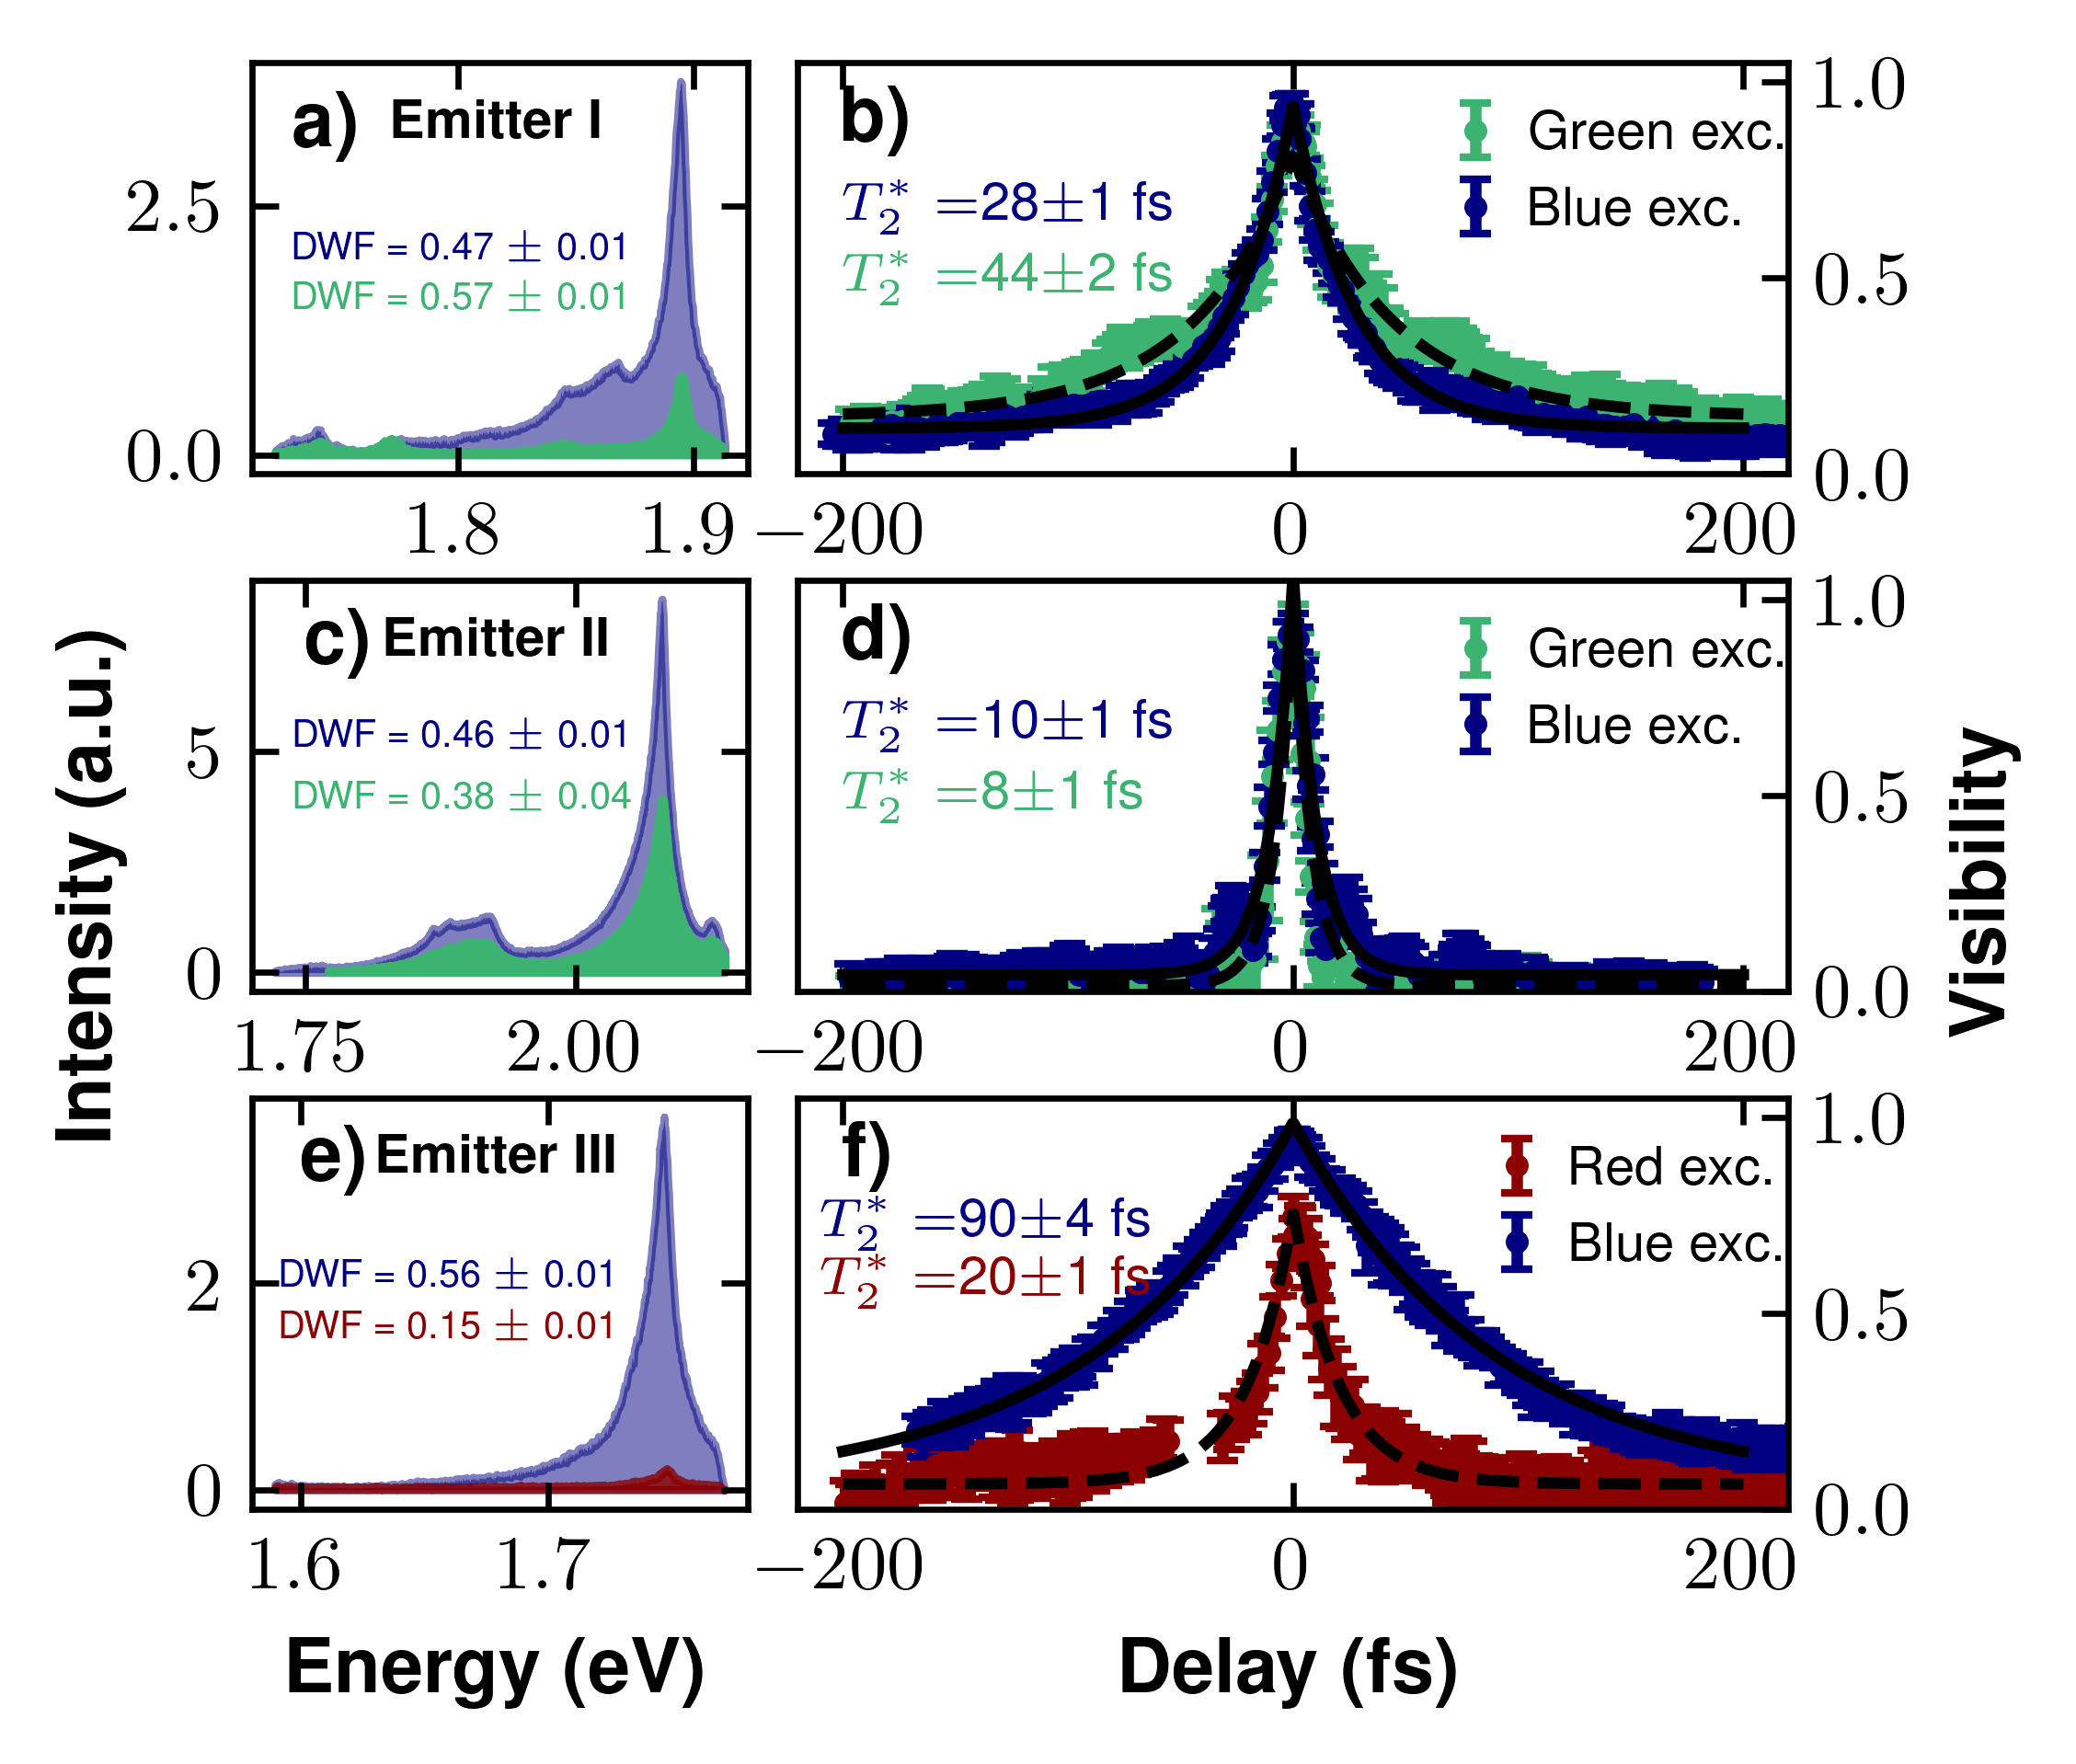

In [49]:
from matplotlib.ticker import MaxNLocator
fig, axs = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(3.3, 3),
    dpi=600,
    gridspec_kw={'width_ratios': [1, 2]}  # izquierda = 1, derecha = 2
)

font_size = 10
cap_size = 2
marker_size = 2
small_font_size=font_size-3
extra_small_font_size=font_size/2

# --- Defect 1 ---
axs[0,0].fill_between(np.array(energy_ROI)/1000, np.array(counts_ROI)/1000, color='navy', alpha=0.5)
axs[0,0].fill_between(np.array(energy_ROI2)/1000, np.array(counts_ROI2)/1000, color='mediumseagreen', alpha=1)
axs[0,0].text(1.73,2, r"DWF = 0.47 $\pm$ 0.01",color = "navy",fontsize=extra_small_font_size)
axs[0,0].text(1.73,1.5, r"DWF = 0.57 $\pm$ 0.01",color = "mediumseagreen",fontsize=extra_small_font_size)
axs[0,0].text(1.73,3.1,r'\textbf{a)}', fontsize=font_size)
axs[0,0].text(0.5, 0.85, r'\textbf{Emitter I}', transform=axs[0,0].transAxes,
        ha='center', va='center',fontsize=small_font_size)

axs[0,1].errorbar(loaded_data_G["Delay (fs)"],loaded_data_G["Visibility"], loaded_data_G["Error in visibility"],
                  marker = 'o',markersize=marker_size,linestyle='none',color = 'mediumseagreen',capsize =cap_size,
                  label = r'Green exc.')
axs[0,1].errorbar(loaded_data_B["Delay (fs)"],loaded_data_B["Visibility"], loaded_data_B["Error in visibility"],
                  marker = 'o',markersize=marker_size,linestyle='none',color = 'navy',capsize = cap_size,
                  label = r'Blue exc.')
axs[0,1].text(-200,0.65,r'$T_2^* = $'+f'{int(round(poptb[1]))}'+r'$\pm$'+ f'{int(np.ceil(pcovb[1,1]))}' +' fs', color = 'navy',fontsize=small_font_size)
axs[0,1].text(-200,0.47,r'$T_2^* = $'+f'{int(round(poptg[1]))}'+r'$\pm$'+ f'{int(round(pcovg[1,1]))}' +' fs', color = 'mediumseagreen',fontsize=small_font_size)
axs[0,1].plot(x_val, modelo_exp(x_val, *poptb), color='k', linestyle='-',zorder=3)
axs[0,1].plot(x_val, modelo_exp(x_val, *poptg), color='k', linestyle='--',zorder=3)
axs[0,1].legend(loc='upper right',
    bbox_to_anchor=(1.05, 1),   # mueve la leyenda un poco a la derecha
    frameon=False,
    handletextpad=0.01,
    fontsize=small_font_size
)
axs[0,1].text(-200, 0.85, r'\textbf{b)}', fontsize=font_size)
axs[0,1].set_ylim(0,1.05)
axs[0,1].set_xlim(-220,220)
axs[0,1].set_yticks(np.linspace(0, 1, 3))

# --- Defect 2 ---
axs[1,0].fill_between(np.array(energy_ROI2b)/1000, np.array(counts_ROI2b)/1000, color='navy', alpha=0.5)
axs[1,0].fill_between(np.array(energy_ROI2g)/1000, np.array(counts_ROI2g)/1000, color='mediumseagreen', alpha=1)
axs[1,0].text(1.74,5.2, r"DWF = 0.46 $\pm$ 0.01",color = "navy",fontsize=extra_small_font_size)
axs[1,0].text(1.74,3.8, r"DWF = 0.38 $\pm$ 0.04",color = "mediumseagreen",fontsize=extra_small_font_size)
axs[1,0].text(1.75,7,r'\textbf{c)}', fontsize=font_size)
axs[1,0].text(0.5, 0.85, r'\textbf{Emitter II}', transform=axs[1,0].transAxes,
        ha='center', va='center',fontsize=small_font_size)


axs[1,1].errorbar(loaded_data_2G["Delay (fs)"],loaded_data_2G["Visibility"], loaded_data_2G["Error in visibility"],
                  marker = 'o',markersize=marker_size,linestyle='none',color = 'mediumseagreen',capsize = cap_size,
                  label = r'Green exc.')
axs[1,1].errorbar(loaded_data_2B["Delay (fs)"],loaded_data_2B["Visibility"], loaded_data_2B["Error in visibility"],
                  marker = 'o',markersize=marker_size,linestyle='none',color = 'navy',capsize = cap_size,
                  label = r'Blue exc.')
axs[1,1].plot(x_val, modelo_exp(x_val, *popt2b), color='k', linestyle='-',zorder=3)
axs[1,1].plot(x_val, modelo_exp(x_val, *popt2g), color='k', linestyle='--',zorder=3)
axs[1,1].text(-200,0.65,r'$T_2^* = $'+f'{int(round(popt2b[1]))}'+r'$\pm$'+ f'{int(np.ceil(pcov2b[1,1]))}' +' fs', color = 'navy',fontsize=small_font_size)
axs[1,1].text(-200,0.47,r'$T_2^* = $'+f'{int(round(popt2g[1]))}'+r'$\pm$'+ f'{int(np.ceil(pcov2g[1,1]))}' +' fs', color = 'mediumseagreen',fontsize=small_font_size)
axs[1,1].legend(loc='upper right',
    bbox_to_anchor=(1.05, 1),   # mueve la leyenda un poco a la derecha
    frameon=False,
    handletextpad=0.01,
    fontsize=small_font_size
)
axs[1,1].text(-200, 0.85, r'\textbf{d)}', fontsize=font_size)
# axs[1,1].set_xlabel(r'\textbf{Delay (fs)}')
axs[1,1].set_ylim(0,1.05)
axs[1,1].set_xlim(-220,220)
axs[1,1].set_yticks(np.linspace(0, 1, 3))

# --- Defect 3 ---
axs[2,0].fill_between(np.array(energy_ROI3b)/1000, np.array(counts_ROI3b)/1000, color='navy', alpha=0.5)
axs[2,0].fill_between(np.array(energy_ROI3r)/1000, np.array(counts_ROI3r)/1000, color='darkred', alpha=0.8)
axs[2,0].text(1.592,2, r"DWF = 0.56 $\pm$ 0.01",color = "navy",fontsize=extra_small_font_size)
axs[2,0].text(1.592,1.5, r"DWF = 0.15 $\pm$ 0.01",color = "darkred",fontsize=extra_small_font_size)
axs[2,0].set_xlabel(r'\textbf{Energy (eV)}', fontsize=font_size)
axs[2,0].text(1.6,3,r'\textbf{e)}', fontsize=font_size)
axs[2,0].text(0.5, 0.85, r'\textbf{Emitter III}', transform=axs[2,0].transAxes,
        ha='center', va='center',fontsize=small_font_size)

axs[2,1].errorbar(loaded_data_3R["Delay (fs)"],loaded_data_3R["Visibility"], loaded_data_3R["Error in visibility"],
                  marker = 'o',markersize=marker_size,linestyle='none',color = 'darkred',capsize = cap_size,
                  label = r'Red exc.')
axs[2,1].errorbar(loaded_data_3B["Delay (fs)"],loaded_data_3B["Visibility"], loaded_data_3B["Error in visibility"],
                  marker = 'o',markersize=marker_size,linestyle='none',color = 'navy',capsize = cap_size,
                  label = r'Blue exc.')
axs[2,1].plot(x_val, modelo_exp(x_val, *popt3b), color='k', linestyle='-',zorder=3)
axs[2,1].plot(x_val, modelo_exp(x_val, *popt3r), color='k', linestyle='--',zorder=3)
axs[2,1].text(-210,0.7,r'$T_2^* = $'+f'{int(round(popt3b[1]))}'+r'$\pm$'+ f'{int(round(pcov3b[1,1]))}' +' fs', color = 'navy',fontsize=small_font_size)
axs[2,1].text(-210,0.55,r'$T_2^* = $'+f'{int(round(popt3r[1]))}'+r'$\pm$'+ f'{int(round(pcov3r[1,1]))}' +' fs', color = 'darkred',fontsize=small_font_size)
axs[2,1].legend(loc='upper right',
    bbox_to_anchor=(1.05, 1),   # mueve la leyenda un poco a la derecha
    frameon=False,
    handletextpad=0.01,
    fontsize=small_font_size
)
axs[2,1].text(-200, 0.85, r'\textbf{f)}')
axs[2,1].set_xlabel(r'\textbf{Delay (fs)}', fontsize=font_size)
axs[2,1].set_ylim(0,1.05)
axs[2,1].set_xlim(-220,220)
axs[2,1].set_yticks(np.linspace(0, 1, 3))


# --- Quitar etiquetas Y de la izquierda ---
for ax in axs[:,0]:
    ax.set_ylabel("")

# --- Quitar etiquetas Y de la derecha ---
for ax in axs[:,1]:
    ax.set_ylabel("")

# --- Etiqueta global para la columna izquierda (intensidad) ---
fig.text(-0.04, 0.5, r'\textbf{Intensity (a.u.)}', va='center', rotation='vertical', fontsize=font_size)

# --- Etiqueta global para la columna derecha (visibilidad) ---
fig.text(1, 0.5, r'\textbf{Visibility}', va='center', rotation='vertical', fontsize=font_size)

# Mover la escala del eje Y de la columna derecha al lado derecho
for ax in axs[:, 1]:
    ax.yaxis.set_label_position("right")  # coloca la etiqueta Y a la derecha
    ax.yaxis.tick_right()                 # coloca los ticks Y a la derecha
    ax.yaxis.set_ticks_position('right')  # asegura que solo se dibujen a la derecha
    ax.yaxis.labelpad = 3                 # separa un poco la etiqueta de los ticks (opcional)
    # Si ya tienes el ylabel puesto, no hace falta repetirlo; si no:
    # ax.set_ylabel(r'\textbf{Visibility}')

# Poner todos los ticks hacia adentro en todos los ejes
for axrow in axs:
    for ax in axrow:
        ax.tick_params(direction="in", which="both", top=True, right=True)
# Evitar que se corte/solape con el borde derecho
plt.tight_layout(pad=0, rect=[0, 0, 0.98, 1])
plt.savefig("Figure4.pdf", format="pdf", bbox_inches='tight')
files.download("Figure4.pdf")
plt.show()